In [80]:
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [81]:
# meme = pd.read_csv('../data/processed/meme.csv')
ai = pd.read_csv('../data/processed/ai.csv')
# rwa = pd.read_csv('../data/processed/rwa.csv')
# gaming = pd.read_csv('../data/processed/gaming.csv')
# meme.shape, ai.shape, rwa.shape, gaming.shape

In [82]:
# complete = pd.concat([meme, ai, rwa, gaming], axis=0)
complete = ai
print(complete.shape)
complete.head()

(113423, 10)


,timestamp,open,high,low,close,volume,name,symbol,id,category
0,1700524800,256.828588,280.485172,222.450883,227.054434,1.588729e+07,Bittensor,TAO,040f0133-1654-4e4e-85ac-417155ca814f,ai
1,1700611200,227.074321,261.177439,227.027250,240.657678,1.077263e+07,Bittensor,TAO,040f0133-1654-4e4e-85ac-417155ca814f,ai
2,1700697600,240.319725,249.557109,228.070858,238.194342,4.922784e+06,Bittensor,TAO,040f0133-1654-4e4e-85ac-417155ca814f,ai
3,1700784000,238.253840,282.541314,233.174439,281.104193,7.027481e+06,Bittensor,TAO,040f0133-1654-4e4e-85ac-417155ca814f,ai
4,1700870400,281.168850,306.404796,260.354129,277.107526,8.923607e+06,Bittensor,TAO,040f0133-1654-4e4e-85ac-417155ca814f,ai


In [83]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113423 entries, 0 to 113422
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  113423 non-null  int64  
 1   open       113423 non-null  float64
 2   high       113423 non-null  float64
 3   low        113423 non-null  float64
 4   close      113423 non-null  float64
 5   volume     113423 non-null  float64
 6   name       113423 non-null  object 
 7   symbol     113423 non-null  object 
 8   id         113423 non-null  object 
 9   category   113423 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 8.7+ MB


In [84]:
duplicates = pd.read_csv('../data/raw/duplicates.csv')
print(duplicates.shape)
duplicates

(19, 4)


,id,name,symbol,category
0,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,SENATE,SENATE,gaming
1,0d8b00d2-9e0a-4489-891b-6e663a6fcd10,Turbo,TURBO,ai
2,1a5aa1bf-0512-4a7d-ac19-ddaccfbee99f,Katana Inu,KATA,gaming
3,1bc28038-aa5b-4e3d-9ad9-eaf8cbfed677,TokenFi,TOKEN,meme
4,1bc28038-aa5b-4e3d-9ad9-eaf8cbfed677,TokenFi,TOKEN,ai
5,1c1cd416-b027-4d73-9d4d-0a9edc63524d,Chromia,CHR,gaming
6,4885df43-d6b8-4aa2-ba26-245b24d09e50,Cere Network,CERE,gaming
7,68221f51-660f-4bed-88e4-680165a9be0c,Kadena,KDA,gaming
8,85ec7d3f-bc7a-4c7a-83c6-1685f18f42fb,Echelon Prime,PRIME,gaming
9,8b88329d-a168-4590-a664-110db3c90308,Phantasma,SOUL,gaming


In [85]:
for index, row in duplicates.iterrows():
    id = row['id']
    category = row['category']
    complete = complete[~((complete['id'] == id) & (complete['category'] == category))]

In [86]:
# check amount of record grouping by id and show it's corresponding name
token_info = complete.groupby('id')['name'].value_counts()
token_info.describe()

count      76.000000
mean     1449.263158
std       668.594733
min        51.000000
25%      1062.500000
50%      1333.000000
75%      1836.000000
max      3020.000000
Name: count, dtype: float64

In [87]:
token_info.head()

id                                    name     
040f0133-1654-4e4e-85ac-417155ca814f  Bittensor     330
0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130  SENATE       1035
04ad4e18-9643-458b-b805-e2d767a161e4  Swash        1081
050cd820-2c82-4222-892c-e6f2859625c7  ROOBEE       1827
0b3d4b05-d9eb-490e-a50f-066fbfed06ac  Delysium      554
Name: count, dtype: int64

In [88]:
# get the ids from the ones that the value count is greater than 990
ids = token_info[token_info > 990].index.get_level_values(0).unique()
ids

Index(['0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130',
       '04ad4e18-9643-458b-b805-e2d767a161e4',
       '050cd820-2c82-4222-892c-e6f2859625c7',
       '0bb97d30-b5bb-45d6-b105-e49436cace0e',
       '0d1428e8-2b88-4314-9b1e-aa664b34a5fe',
       '172a1e9a-f56c-4386-85e1-093d801e4e93',
       '17b79ace-0c1e-4812-a6fe-755011a721f9',
       '18b987bb-2597-4288-a28e-08d7dbce2ee2',
       '196199f6-1c8f-4be4-83dd-733866d6d558',
       '19e9aefe-520d-4f30-b24f-de479e6c14d7',
       '1c4b99df-6f74-423e-88e5-653b6cdd3c83',
       '1e389c02-0a09-4b57-9c50-3a74bca12e4f',
       '1f34fd87-5598-40e7-ac78-7efd6bd28bdd',
       '2229824b-e9ca-4f83-804a-e27561cf252e',
       '22820bda-48eb-45bd-b189-af3253ab57c0',
       '27e623a1-bca0-461d-8ca4-90db9a4c3eee',
       '2a69c9d6-c36c-44d5-a5ce-97c1806c0d56',
       '3ea9f9ed-f985-4d35-b6f2-1f9b70e27550',
       '3ee65bec-c8c8-482d-ba5c-5c594cc86f2f',
       '42876b1c-10af-47c9-a4f9-853fc207f7b0',
       '4885df43-d6b8-4aa2-ba26-245b24d09e50',
       '48f44

In [89]:
# filter the complete dataset with the ids that have more than 990 records
filtered = complete[complete['id'].isin(ids)]
print(filtered.shape)
filtered.head()

(102131, 10)


,timestamp,open,high,low,close,volume,name,symbol,id,category
330,1639526400,4.744375,5.317031,2.173027,3.078208,1.480910e+06,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
331,1639612800,3.090095,3.299374,2.405868,2.605501,6.657927e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
332,1639699200,2.625207,3.096436,2.283871,2.741340,5.401045e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
333,1639785600,2.771380,3.038297,2.604262,2.720898,2.294669e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
334,1639872000,2.726673,2.815944,2.498097,2.724654,1.654344e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai


In [90]:
# get the first timestamp for each id
first_timestamp = filtered.groupby('id').timestamp.min()
print(first_timestamp.shape)
first_timestamp.head()

(62,)


id
0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130    1639526400
04ad4e18-9643-458b-b805-e2d767a161e4    1635638400
050cd820-2c82-4222-892c-e6f2859625c7    1571184000
0bb97d30-b5bb-45d6-b105-e49436cace0e    1502323200
0d1428e8-2b88-4314-9b1e-aa664b34a5fe    1467676800
Name: timestamp, dtype: int64

In [91]:
first_timestamp.sort_values()

id
0d1428e8-2b88-4314-9b1e-aa664b34a5fe    1467676800
d1f48a57-2c48-4512-abd6-90e8c29e5aba    1493251200
bc49d919-2925-472d-8bef-e189c0059ccc    1498176000
0bb97d30-b5bb-45d6-b105-e49436cace0e    1502323200
f59f39ff-5230-42bb-acce-7767dc84cd83    1509062400
                                           ...    
04ad4e18-9643-458b-b805-e2d767a161e4    1635638400
4885df43-d6b8-4aa2-ba26-245b24d09e50    1636329600
27e623a1-bca0-461d-8ca4-90db9a4c3eee    1637193600
e5d6cff1-5f6b-4468-98d6-84354d1704d0    1638403200
0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130    1639526400
Name: timestamp, Length: 62, dtype: int64

In [92]:
# show the minimum timestamp for all
max_min_timestamp = first_timestamp.max()
print(max_min_timestamp, pd.to_datetime(max_min_timestamp, unit='s'))

1639526400 2021-12-15 00:00:00


In [93]:
# in complete check in how many rows the timestamp is 1409011200
filtered = filtered[filtered.timestamp == max_min_timestamp]['id']

In [94]:
# from complete just remain the rows that are in filtered
complete = complete[complete['id'].isin(filtered)]
print(complete.shape)
complete.head()

(102131, 10)


,timestamp,open,high,low,close,volume,name,symbol,id,category
330,1639526400,4.744375,5.317031,2.173027,3.078208,1.480910e+06,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
331,1639612800,3.090095,3.299374,2.405868,2.605501,6.657927e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
332,1639699200,2.625207,3.096436,2.283871,2.741340,5.401045e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
333,1639785600,2.771380,3.038297,2.604262,2.720898,2.294669e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
334,1639872000,2.726673,2.815944,2.498097,2.724654,1.654344e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai


In [95]:
token_info2 = complete.groupby('id')['name'].value_counts()
token_info2.describe()

count      62.000000
mean     1647.274194
std       558.135660
min      1007.000000
25%      1253.500000
50%      1438.500000
75%      2178.750000
max      3020.000000
Name: count, dtype: float64

In [96]:
token_info2

id                                    name        
0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130  SENATE          1035
04ad4e18-9643-458b-b805-e2d767a161e4  Swash           1081
050cd820-2c82-4222-892c-e6f2859625c7  ROOBEE          1827
0bb97d30-b5bb-45d6-b105-e49436cace0e  Golem           2624
0d1428e8-2b88-4314-9b1e-aa664b34a5fe  LBRY Credits    3020
                                                      ... 
f59f39ff-5230-42bb-acce-7767dc84cd83  Presearch       2531
fcb726c7-364f-4252-8ee8-70b0bbbd8791  The Graph       1399
fefa947d-7719-4915-b24f-29a25ab34e80  Bird.Money      1421
ff9c05cd-d3f6-4495-b8d6-7e6530a6dcab  inSure DeFi     1197
ffaebc24-053e-428e-a84d-be836e4f8a3a  Flux            1293
Name: count, Length: 62, dtype: int64

In [97]:
complete.duplicated(['id', 'timestamp']).sum()

0

In [98]:
complete['timestamp'] = pd.to_datetime(complete['timestamp'], unit='s')
complete.head()

,timestamp,open,high,low,close,volume,name,symbol,id,category
330,2021-12-15,4.744375,5.317031,2.173027,3.078208,1.480910e+06,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
331,2021-12-16,3.090095,3.299374,2.405868,2.605501,6.657927e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
332,2021-12-17,2.625207,3.096436,2.283871,2.741340,5.401045e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
333,2021-12-18,2.771380,3.038297,2.604262,2.720898,2.294669e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
334,2021-12-19,2.726673,2.815944,2.498097,2.724654,1.654344e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai


In [99]:
# just remain the rows with timestamp greater or equal than 1641859200
complete = complete[complete.timestamp >= pd.to_datetime(max_min_timestamp, unit='s')]
print(complete.shape)
complete.head()

(63452, 10)


,timestamp,open,high,low,close,volume,name,symbol,id,category
330,2021-12-15,4.744375,5.317031,2.173027,3.078208,1.480910e+06,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
331,2021-12-16,3.090095,3.299374,2.405868,2.605501,6.657927e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
332,2021-12-17,2.625207,3.096436,2.283871,2.741340,5.401045e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
333,2021-12-18,2.771380,3.038297,2.604262,2.720898,2.294669e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
334,2021-12-19,2.726673,2.815944,2.498097,2.724654,1.654344e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai


In [100]:
# reset the index
complete.reset_index(drop=True, inplace=True)

In [101]:
complete.head()

,timestamp,open,high,low,close,volume,name,symbol,id,category
0,2021-12-15,4.744375,5.317031,2.173027,3.078208,1.480910e+06,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
1,2021-12-16,3.090095,3.299374,2.405868,2.605501,6.657927e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
2,2021-12-17,2.625207,3.096436,2.283871,2.741340,5.401045e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
3,2021-12-18,2.771380,3.038297,2.604262,2.720898,2.294669e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
4,2021-12-19,2.726673,2.815944,2.498097,2.724654,1.654344e+05,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai


In [102]:
# Data manipulation
# ==============================================================================
import sys
import os
import warnings
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from statsmodels.graphics.tsaplots import plot_acf

# Modelling and Forecasting
# ==============================================================================
import sklearn
import skforecast
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import  HistGradientBoostingRegressor
from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import bayesian_search_forecaster
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import bayesian_search_forecaster_multiseries
from skforecast.model_selection_multiseries import select_features_multiseries
from skforecast.plot import set_dark_theme
from skforecast.preprocessing import series_long_to_dict
from skforecast.preprocessing import exog_long_to_dict

# Warnings configuration
# ==============================================================================
warnings.filterwarnings('once')

color = '\033[1m\033[38;5;208m'
print(f"{color}Version skforecast: {skforecast.__version__}")
print(f"{color}Version scikit-learn: {sklearn.__version__}")
print(f"{color}Version pandas: {pd.__version__}")
print(f"{color}Version numpy: {np.__version__}")

Version skforecast: 0.13.0
Version scikit-learn: 1.5.2
Version pandas: 2.2.3
Version numpy: 1.26.4


In [103]:
# #standardize close in complete
# scaler = StandardScaler()
# complete['close'] = scaler.fit_transform(complete[['close']])
# complete.head()
# standardize open, high, low, close and volume
scaler = StandardScaler()
complete[['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(complete[['open', 'high', 'low', 'close', 'volume']])
complete.head()

,timestamp,open,high,low,close,volume,name,symbol,id,category
0,2021-12-15,0.748669,0.812477,0.225950,0.396992,-0.165836,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
1,2021-12-16,0.397066,0.405710,0.278034,0.296047,-0.181694,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
2,2021-12-17,0.298258,0.364797,0.250744,0.325055,-0.184139,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
3,2021-12-18,0.329326,0.353076,0.322412,0.320690,-0.190182,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai
4,2021-12-19,0.319823,0.308249,0.298664,0.321492,-0.191428,SENATE,SENATE,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,ai


In [104]:
series = complete[['timestamp', 'id', 'name', 'close']]
exog = complete[['timestamp', 'id', 'open', 'high', 'low', 'volume']]
series.shape, exog.shape

((63452, 4), (63452, 6))

In [105]:
# do one hot encode for category
# exog = pd.get_dummies(exog, columns=['category'], drop_first=True, dtype=np.float64)

In [106]:
exog.head()

,timestamp,id,open,high,low,volume
0,2021-12-15,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,0.748669,0.812477,0.225950,-0.165836
1,2021-12-16,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,0.397066,0.405710,0.278034,-0.181694
2,2021-12-17,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,0.298258,0.364797,0.250744,-0.184139
3,2021-12-18,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,0.329326,0.353076,0.322412,-0.190182
4,2021-12-19,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,0.319823,0.308249,0.298664,-0.191428


In [107]:
exog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63452 entries, 0 to 63451
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  63452 non-null  datetime64[ns]
 1   id         63452 non-null  object        
 2   open       63452 non-null  float64       
 3   high       63452 non-null  float64       
 4   low        63452 non-null  float64       
 5   volume     63452 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 2.9+ MB


In [108]:
# series_dict = series_long_to_dict(
#     data      = complete,
#     series_id = 'id',
#     index     = 'timestamp',
#     values    = 'close',
#     freq      = 'D'
# )

# series_dict = series_long_to_dict(
#     data      = complete,
#     series_id = 'id',
#     index     = 'timestamp',
#     values    = 'close',
#     freq      = 'D'
# )

# exog_dict = exog_long_to_dict(
#     data      = exog,
#     series_id = 'id',
#     index     = 'timestamp',
#     freq      = 'D'
# )

features = ['close', 'open', 'high', 'low']

series_dict = {feature: series_long_to_dict(
                 data=complete, 
                 series_id='id', 
                 index='timestamp', 
                 values=feature, 
                 freq='D') for feature in features}

# exog_dict = {feature: exog_long_to_dict(
#                  data=exog, 
#                  series_id='id', 
#                  index='timestamp', 
#                  freq='D') for feature in features}

In [109]:
# end_train = '2024-01-01 00:00:00'
# series_dict_train = {k: v.loc[: end_train,] for k, v in series_dict.items()}
# exog_dict_train   = {k: v.loc[: end_train,] for k, v in exog_dict.items()}
# series_dict_test  = {k: v.loc[end_train:,] for k, v in series_dict.items()}
# exog_dict_test    = {k: v.loc[end_train:,] for k, v in exog_dict.items()}

In [110]:
# set_dark_theme()
# colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# # Ensure there are enough colors
# if len(colors) < len(series_dict):
#     colors = colors * (len(series_dict) // len(colors) + 1)
# fig, axs = plt.subplots(20, 1, figsize=(20, 10), sharex=True)
# for i, s in enumerate(list(series_dict.values())[:20]):
#     axs[i].plot(s, label=s.name, color=colors[i])
#     axs[i].legend(loc='upper right', fontsize=8)
#     axs[i].tick_params(axis='both', labelsize=8)
#     axs[i].axvline(pd.to_datetime(end_train) , color='white', linestyle='--', linewidth=1) # End train

In [111]:
# for k in series_dict.keys():
#     print(f"{k}:")
#     try:
#         print(
#             f"\tTrain: len={len(series_dict_train[k])}, {series_dict_train[k].index[0]}"
#             f" --- {series_dict_train[k].index[-1]}"
#         )
#     except:
#         print(f"\tTrain: len=0")
#     try:
#         print(
#             f"\tTest : len={len(series_dict_test[k])}, {series_dict_test[k].index[0]}"
#             f" --- {series_dict_test[k].index[-1]}"
#         )
#     except:
#         print(f"\tTest : len=0")

In [112]:
# for k in series_dict.keys():
#     print(f"{k}:")
#     try:
#         print(f"\t{exog_dict[k].columns.to_list()}")
#     except:
#         print(f"\tNo exogenous variables")

In [113]:
regressor = HistGradientBoostingRegressor(random_state=123, max_depth=5)
forecaster = ForecasterAutoregMultiSeries(
                regressor          = regressor,
                lags               = 20,
                encoding           = "ordinal",
                dropna_from_series = False
            )

# forecaster.fit(series=series_dict_train, exog=exog_dict_train , suppress_warnings=True)
# forecaster

In [114]:
for feature in features:
    forecaster.fit(series=series_dict[feature], suppress_warnings=True)

In [115]:
steps_ahead = 30
predictions_x_days = forecaster.predict(steps=steps_ahead)

In [116]:
predictions_x_days

,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,04ad4e18-9643-458b-b805-e2d767a161e4,050cd820-2c82-4222-892c-e6f2859625c7,0bb97d30-b5bb-45d6-b105-e49436cace0e,0d1428e8-2b88-4314-9b1e-aa664b34a5fe,172a1e9a-f56c-4386-85e1-093d801e4e93,17b79ace-0c1e-4812-a6fe-755011a721f9,18b987bb-2597-4288-a28e-08d7dbce2ee2,196199f6-1c8f-4be4-83dd-733866d6d558,19e9aefe-520d-4f30-b24f-de479e6c14d7,...,e0b5d4c5-045f-4b26-8baf-d527ab815227,e5d6cff1-5f6b-4468-98d6-84354d1704d0,edc4c45b-8d00-4a9f-8787-1effca2aeba4,f057b926-d44e-4eb4-a802-27ca5231bec2,f2cfff3b-a8ae-434f-b9e3-1c81a0ba2f81,f59f39ff-5230-42bb-acce-7767dc84cd83,fcb726c7-364f-4252-8ee8-70b0bbbd8791,fefa947d-7719-4915-b24f-29a25ab34e80,ff9c05cd-d3f6-4495-b8d6-7e6530a6dcab,ffaebc24-053e-428e-a84d-be836e4f8a3a
2024-10-16,-0.25014,-0.258666,-0.259391,-0.187072,-0.258504,-0.251906,-0.257114,-0.259391,-0.259391,-0.247274,...,-0.257754,-0.258332,-0.233575,-0.199046,1.571272,-0.258332,-0.223111,0.232570,-0.258912,-0.143759
2024-10-17,-0.25014,-0.258532,-0.259322,-0.187072,-0.258523,-0.251906,-0.256858,-0.259322,-0.259019,-0.247274,...,-0.258797,-0.258332,-0.233926,-0.199046,1.563278,-0.258332,-0.222694,0.226351,-0.258112,-0.143759
2024-10-18,-0.25014,-0.258379,-0.259272,-0.187072,-0.259053,-0.251906,-0.256788,-0.259272,-0.258452,-0.247609,...,-0.258729,-0.258332,-0.234897,-0.199046,1.567102,-0.258332,-0.222694,0.233775,-0.258152,-0.143759
2024-10-19,-0.25014,-0.258379,-0.259107,-0.187072,-0.259234,-0.251906,-0.256788,-0.259107,-0.258232,-0.247274,...,-0.257986,-0.258332,-0.233968,-0.199046,1.599622,-0.258332,-0.222694,0.233410,-0.257994,-0.143759
2024-10-20,-0.25014,-0.258379,-0.258926,-0.187072,-0.259621,-0.251906,-0.256788,-0.258926,-0.258484,-0.247274,...,-0.257971,-0.258332,-0.233968,-0.199046,1.606432,-0.258332,-0.222694,0.232821,-0.258258,-0.143759
2024-10-21,-0.25014,-0.258379,-0.258802,-0.187072,-0.259047,-0.251906,-0.256788,-0.258802,-0.258468,-0.247274,...,-0.258079,-0.258332,-0.234897,-0.199046,1.612606,-0.258137,-0.222694,0.235865,-0.258242,-0.143759
2024-10-22,-0.25014,-0.258379,-0.258802,-0.187072,-0.259242,-0.251906,-0.256788,-0.258802,-0.258515,-0.247274,...,-0.258063,-0.258137,-0.233968,-0.199046,1.612606,-0.258137,-0.222694,0.235865,-0.258190,-0.143759
2024-10-23,-0.25014,-0.258379,-0.258649,-0.187072,-0.259700,-0.251906,-0.256788,-0.258649,-0.258515,-0.247274,...,-0.258242,-0.258137,-0.233926,-0.199046,1.612639,-0.258137,-0.222694,0.231299,-0.258283,-0.143759
2024-10-24,-0.25014,-0.258184,-0.258416,-0.187072,-0.259164,-0.251906,-0.256788,-0.258416,-0.258221,-0.247274,...,-0.257852,-0.258085,-0.234854,-0.199046,1.612639,-0.257859,-0.222694,0.235867,-0.258184,-0.143759
2024-10-25,-0.25014,-0.258184,-0.258416,-0.187072,-0.258840,-0.251906,-0.256788,-0.258416,-0.258221,-0.247274,...,-0.257958,-0.257859,-0.233968,-0.199046,1.606465,-0.257859,-0.222694,0.235867,-0.257906,-0.143759


In [117]:
series_dict

{'close': {'0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130': 2021-12-15    0.396992
  2021-12-16    0.296047
  2021-12-17    0.325055
  2021-12-18    0.320690
  2021-12-19    0.321492
                  ...   
  2024-10-11   -0.250673
  2024-10-12   -0.250495
  2024-10-13   -0.251102
  2024-10-14   -0.250493
  2024-10-15   -0.250881
  Freq: D, Name: 0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130, Length: 1036, dtype: float64,
  '04ad4e18-9643-458b-b805-e2d767a161e4': 2021-12-15   -0.231335
  2021-12-16   -0.231513
  2021-12-17   -0.233970
  2021-12-18   -0.233465
  2021-12-19   -0.230543
                  ...   
  2024-10-11   -0.259155
  2024-10-12   -0.259143
  2024-10-13   -0.259131
  2024-10-14   -0.259107
  2024-10-15   -0.259105
  Freq: D, Name: 04ad4e18-9643-458b-b805-e2d767a161e4, Length: 1036, dtype: float64,
  '050cd820-2c82-4222-892c-e6f2859625c7': 2021-12-15   -0.259275
  2021-12-16   -0.259370
  2021-12-17   -0.259531
  2021-12-18   -0.259529
  2021-12-19   -0.259542
                  ...   
 

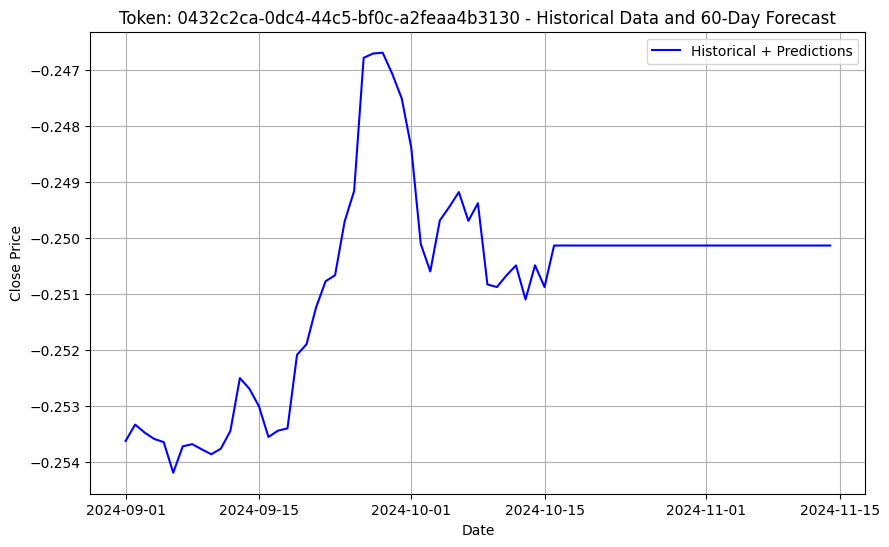

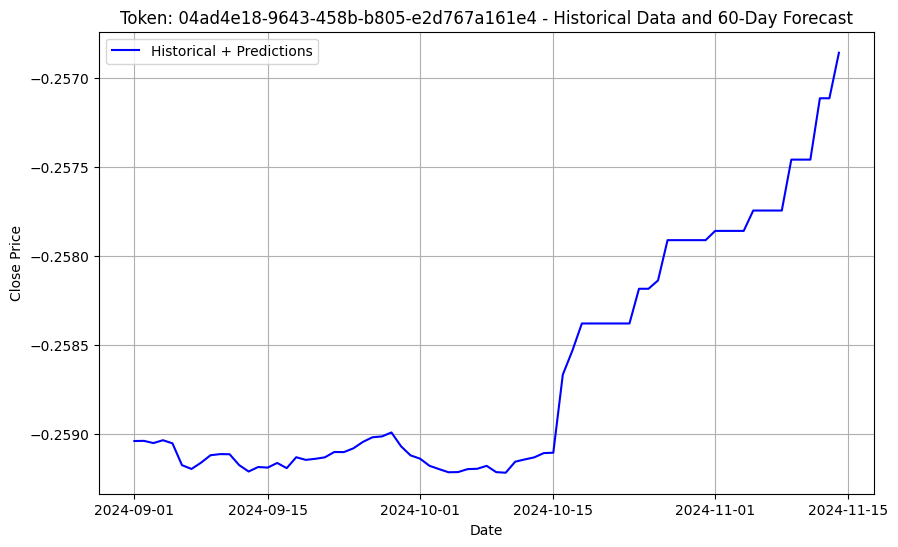

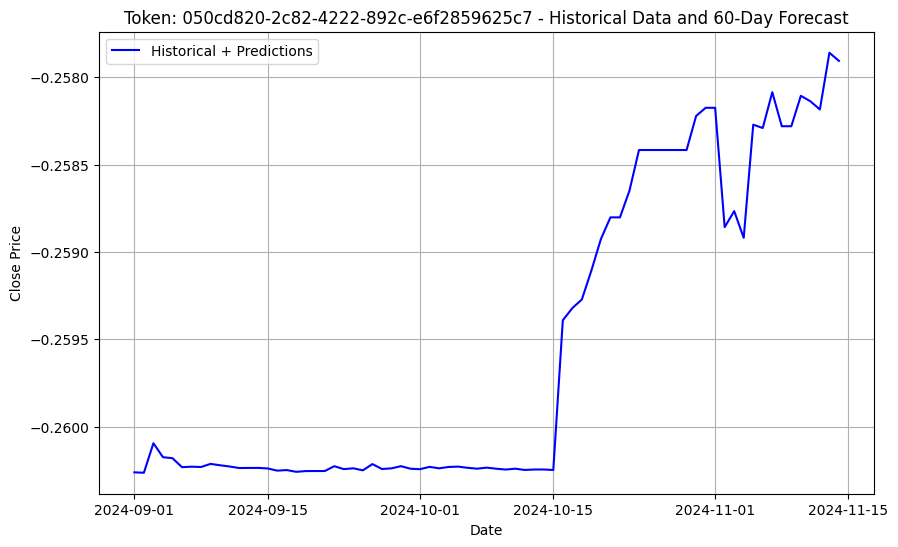

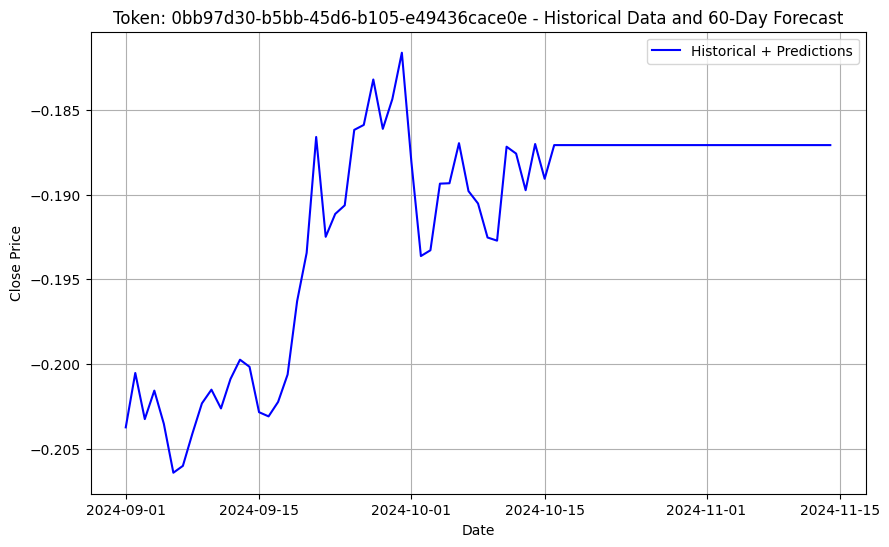

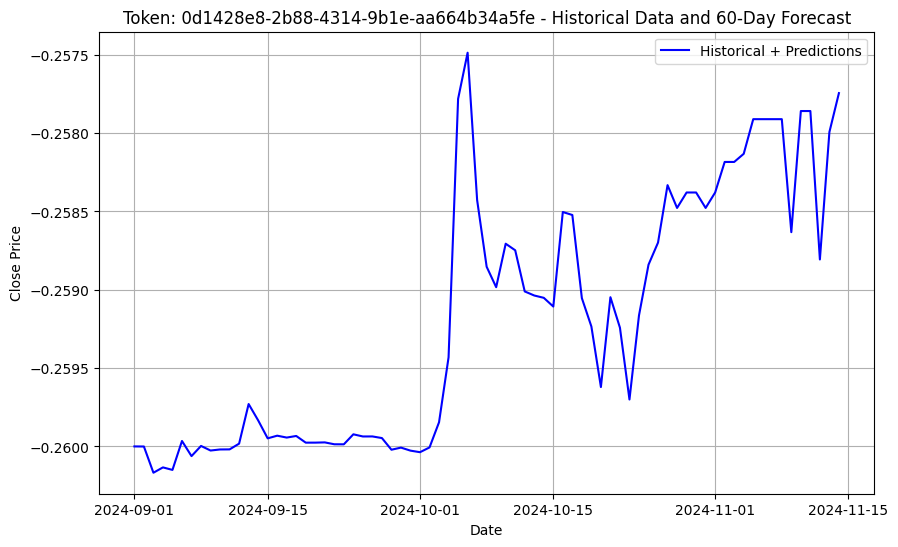

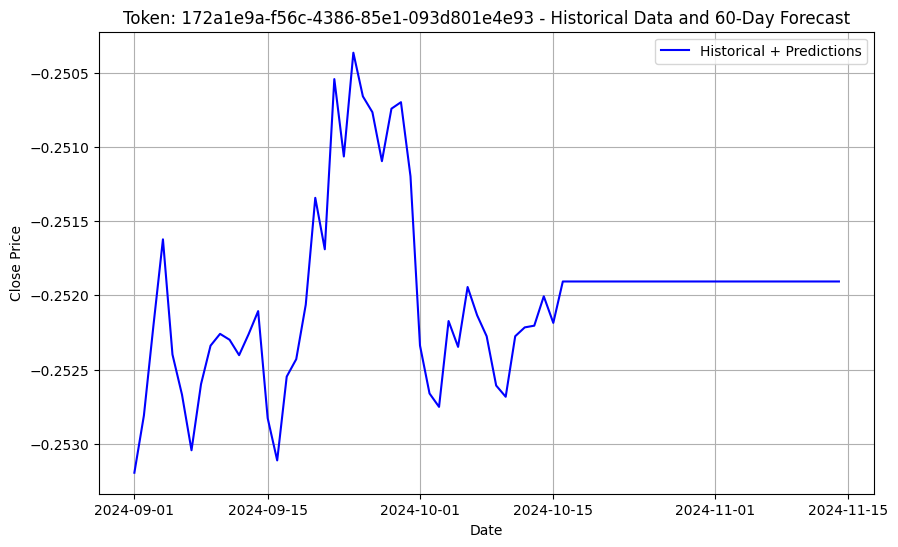

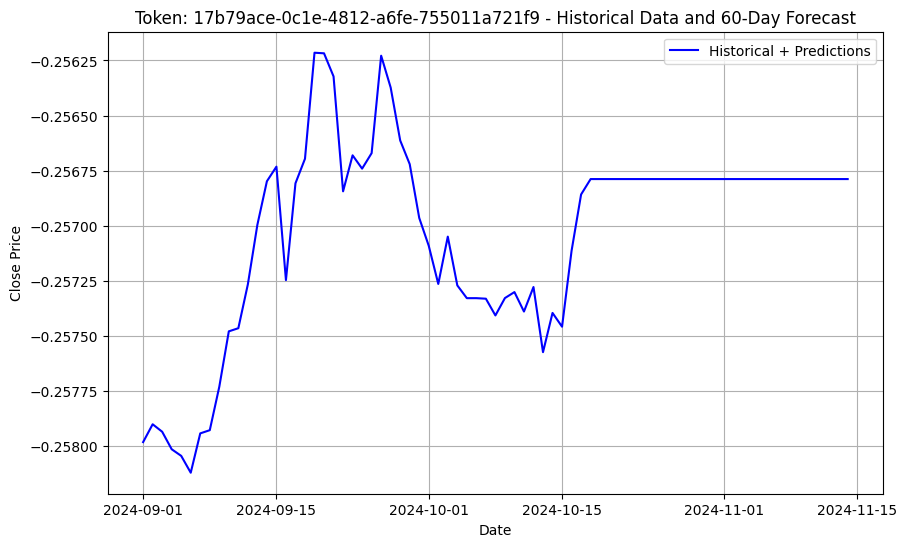

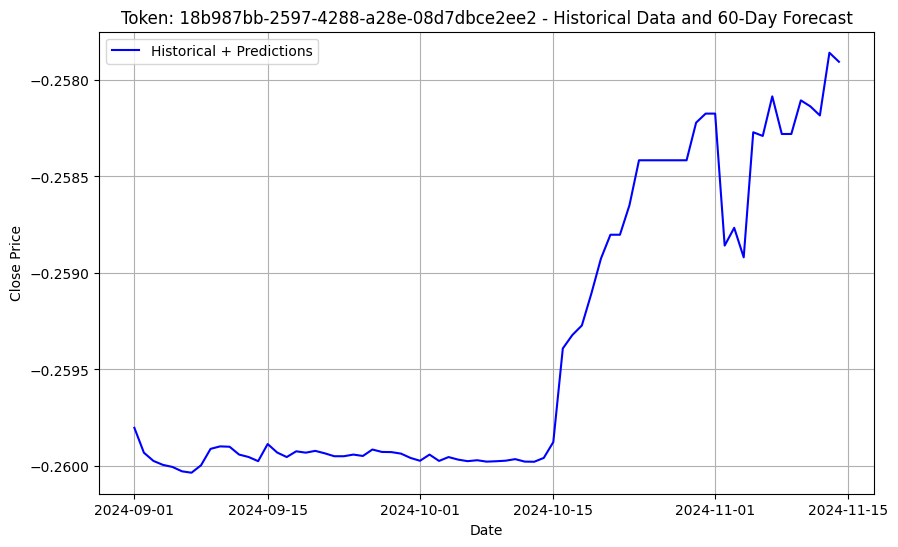

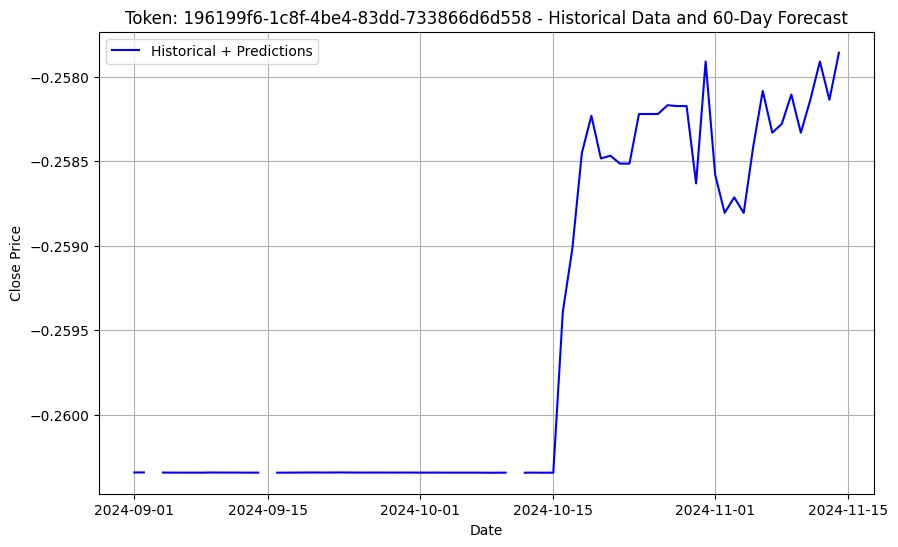

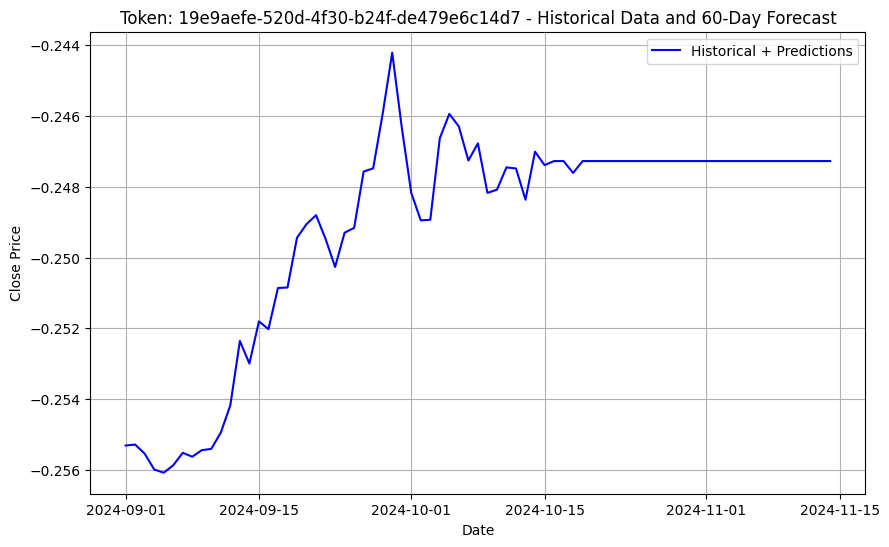

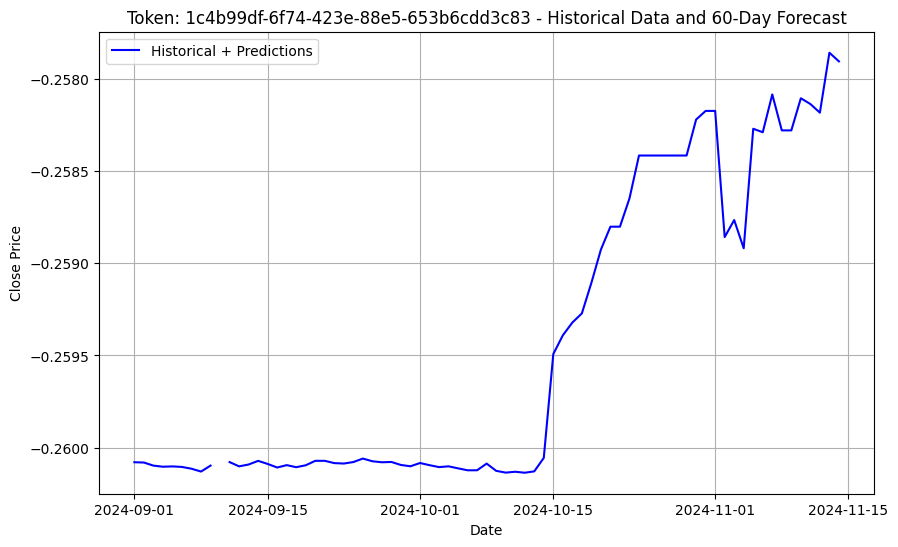

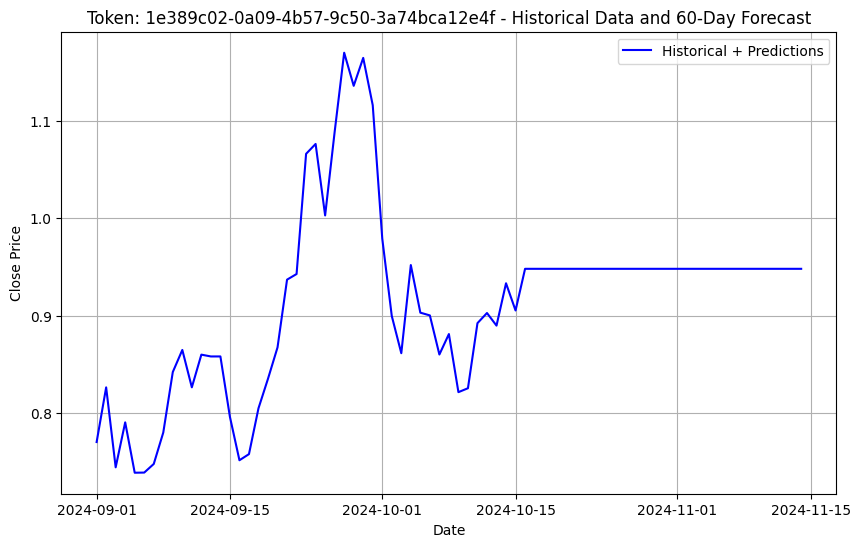

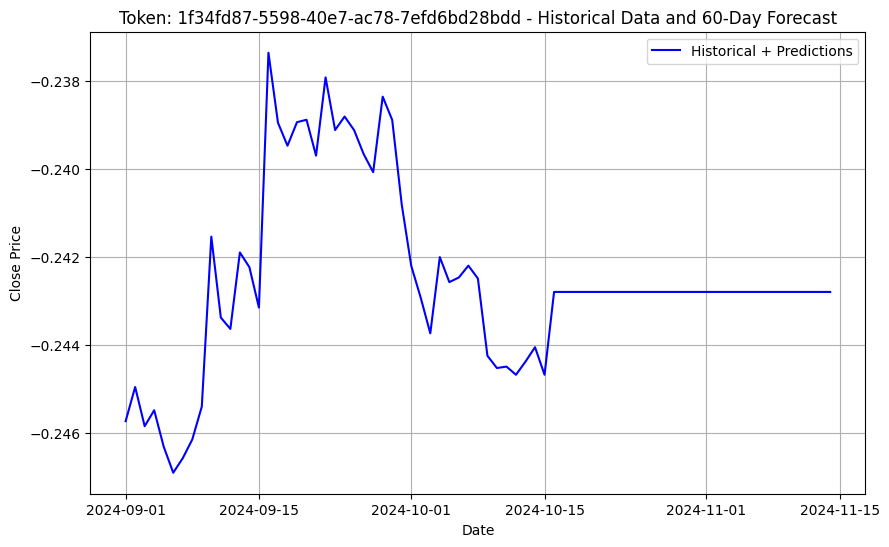

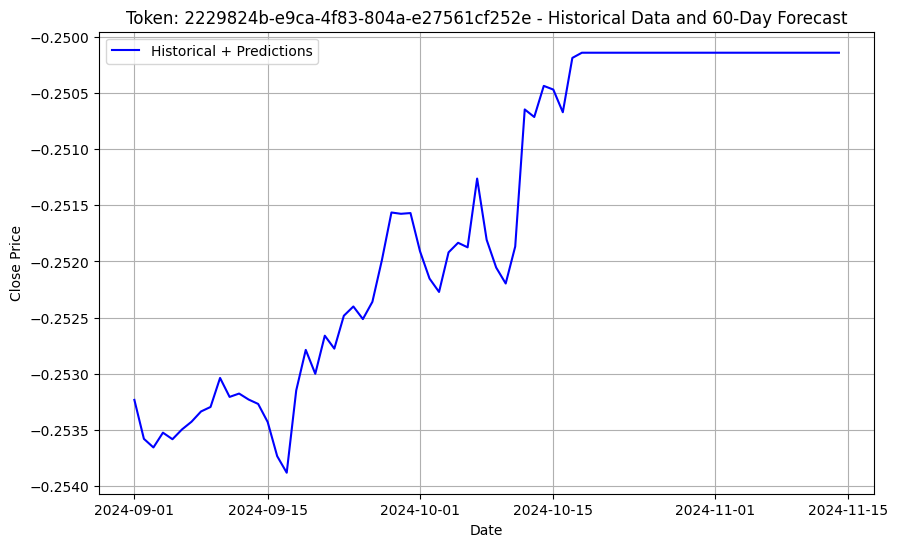

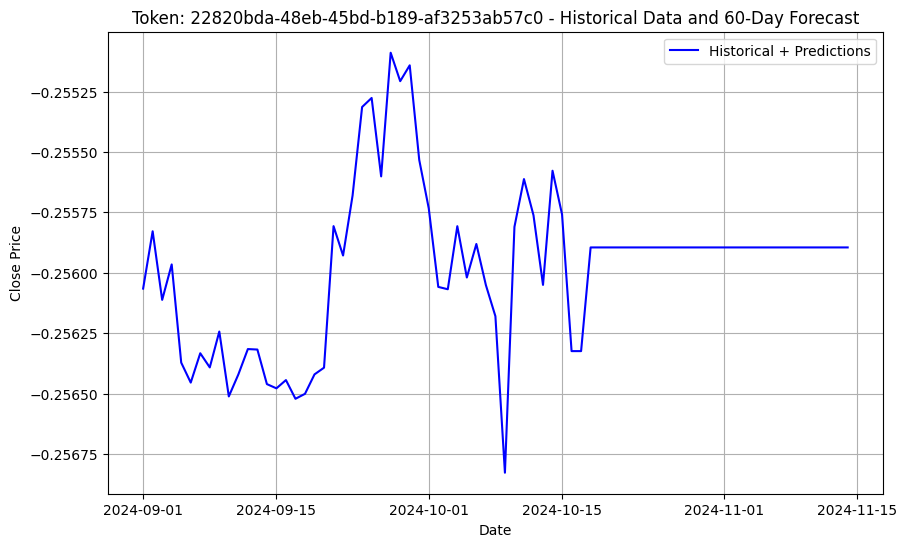

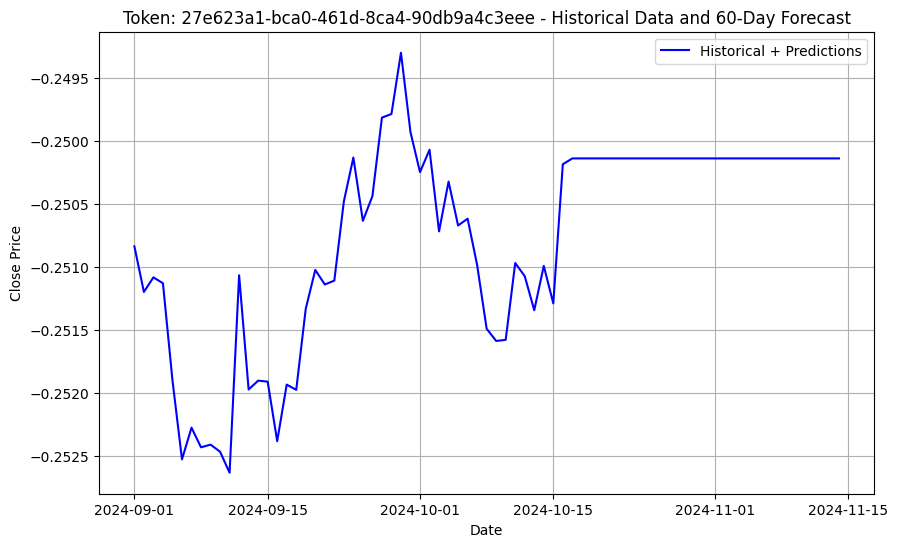

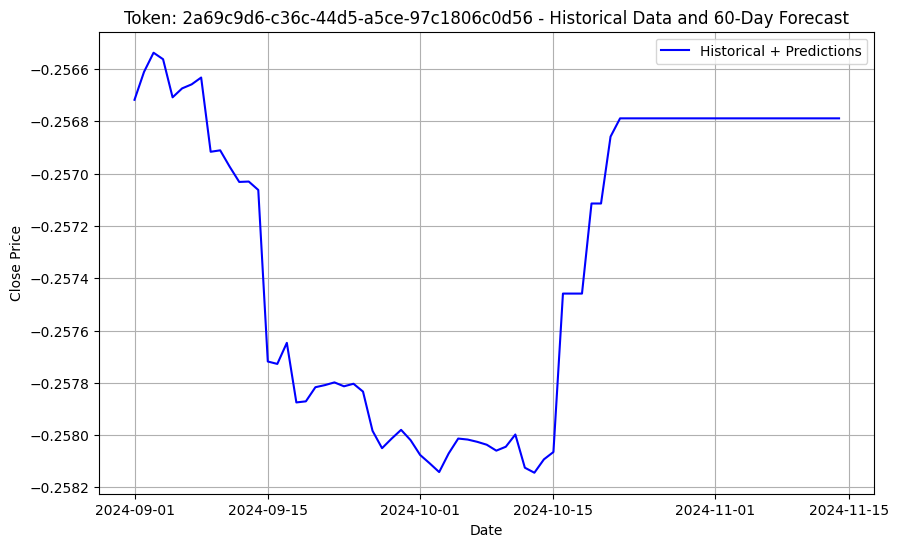

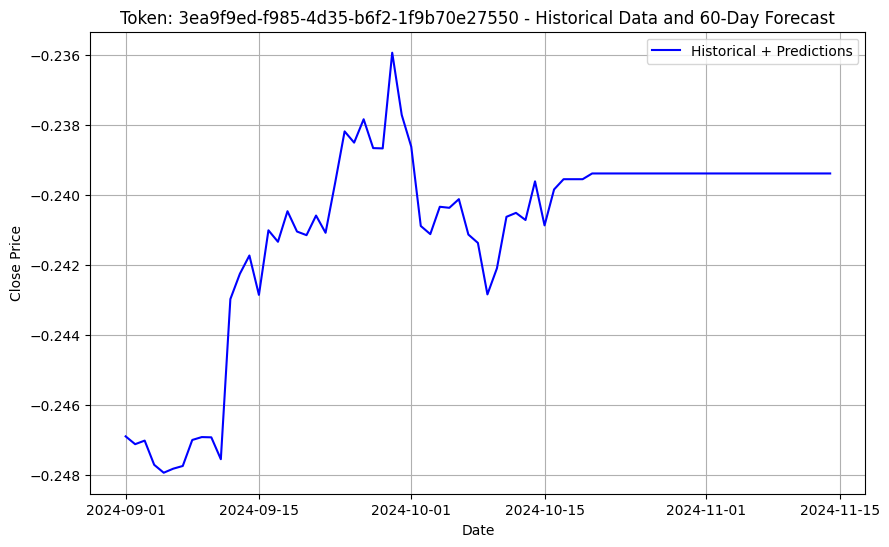

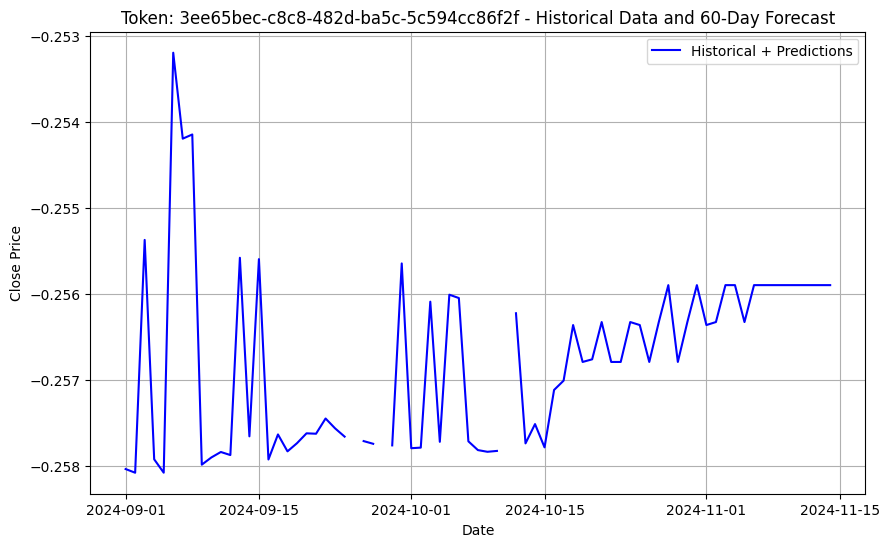

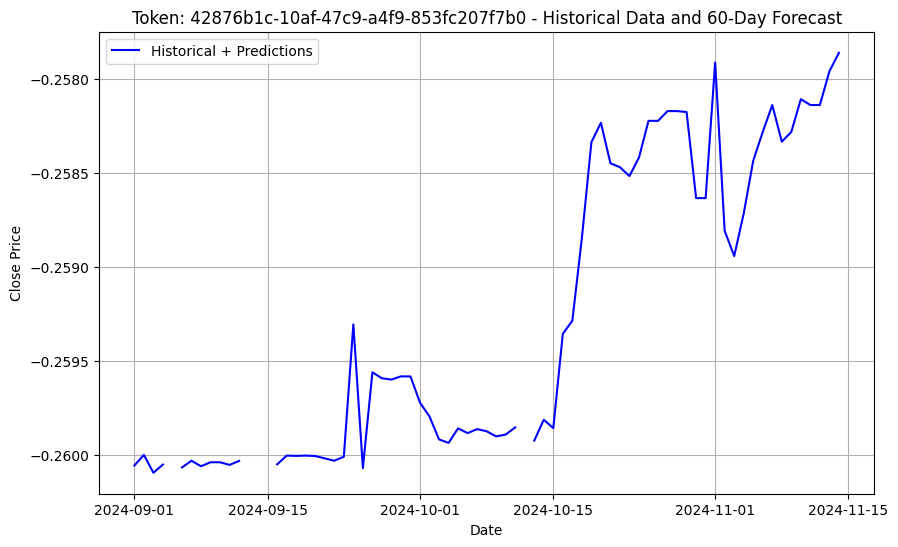

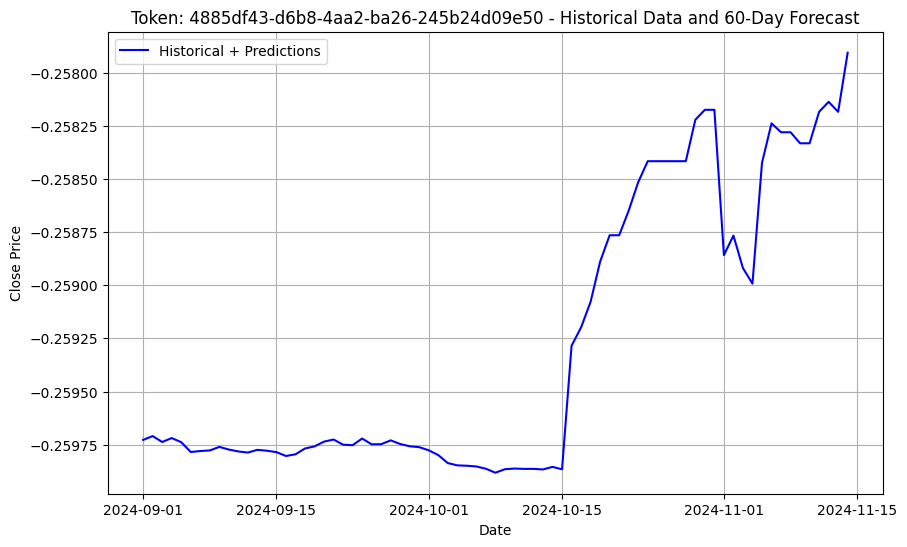

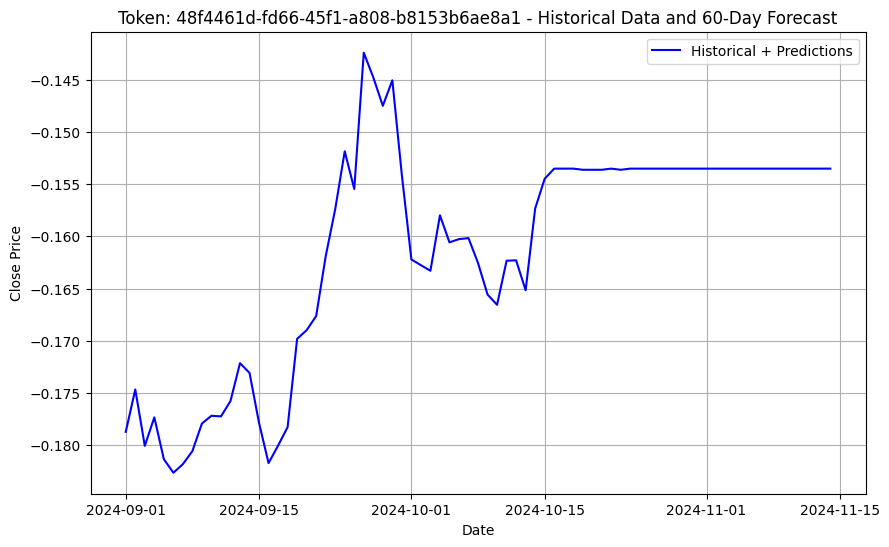

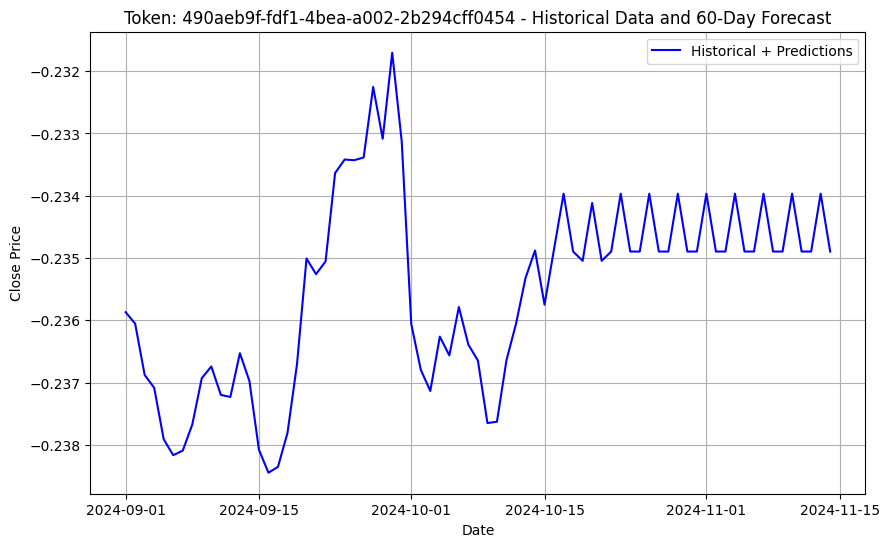

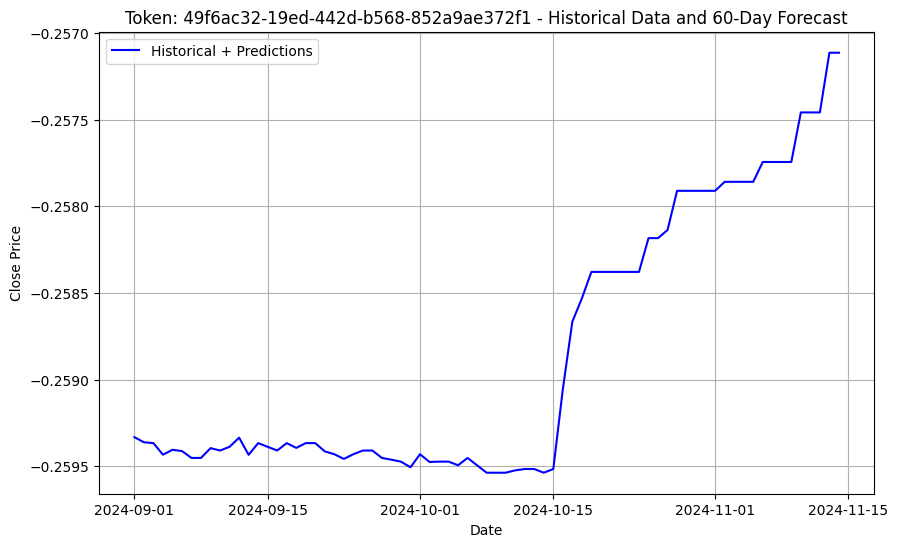

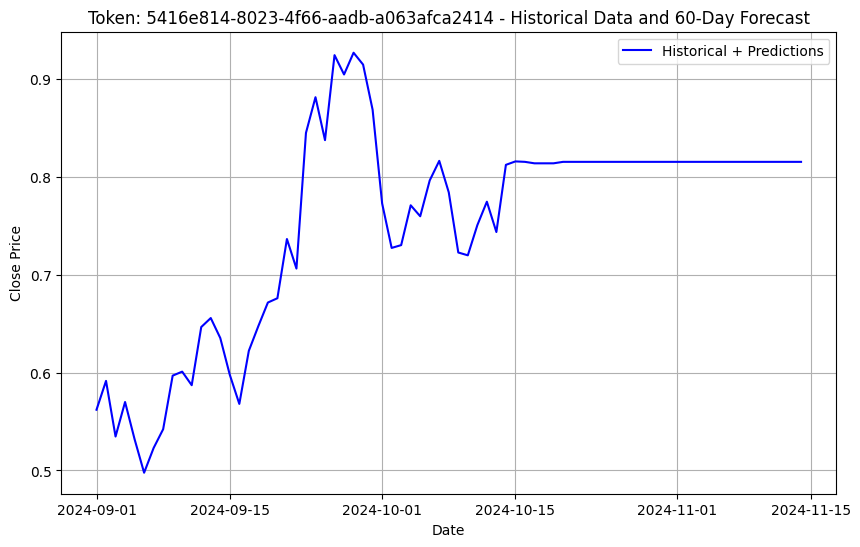

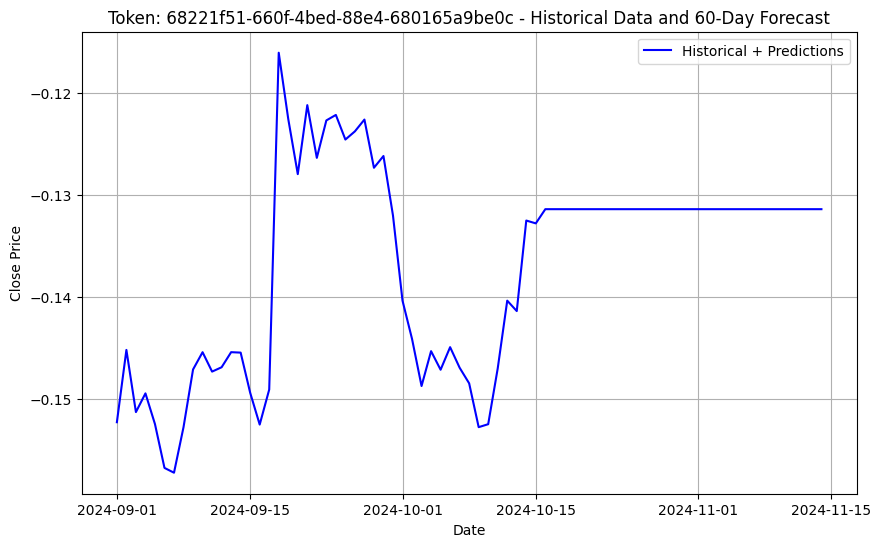

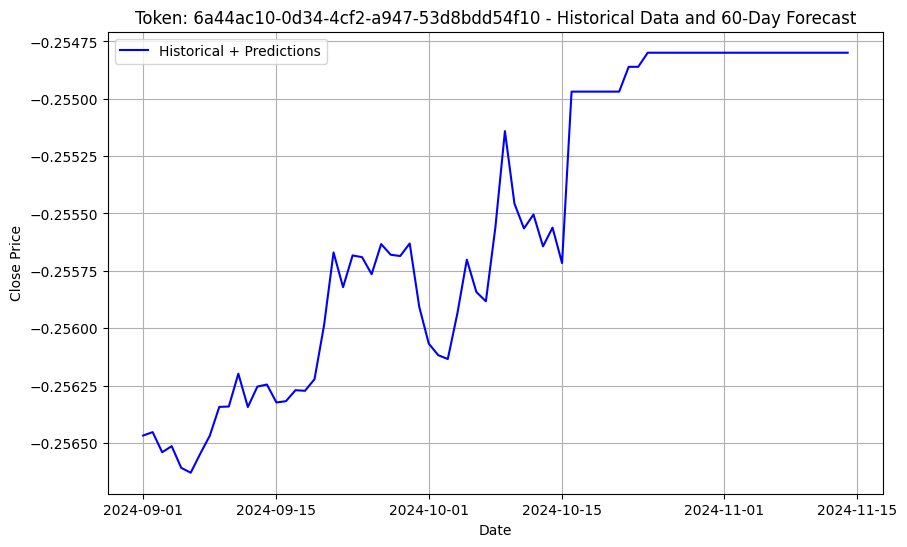

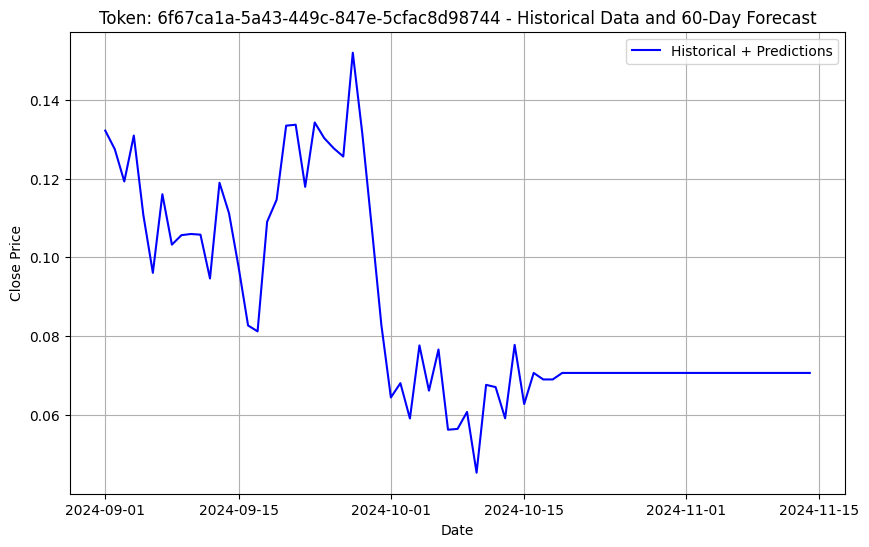

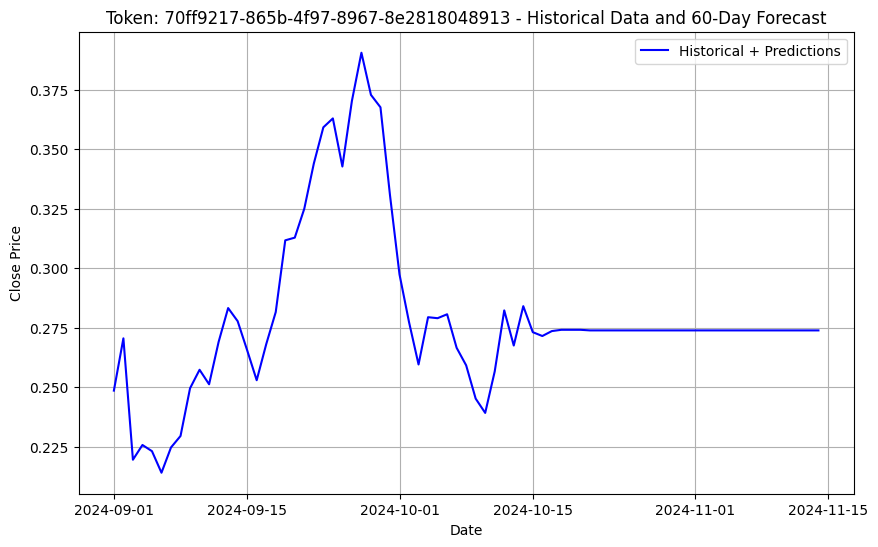

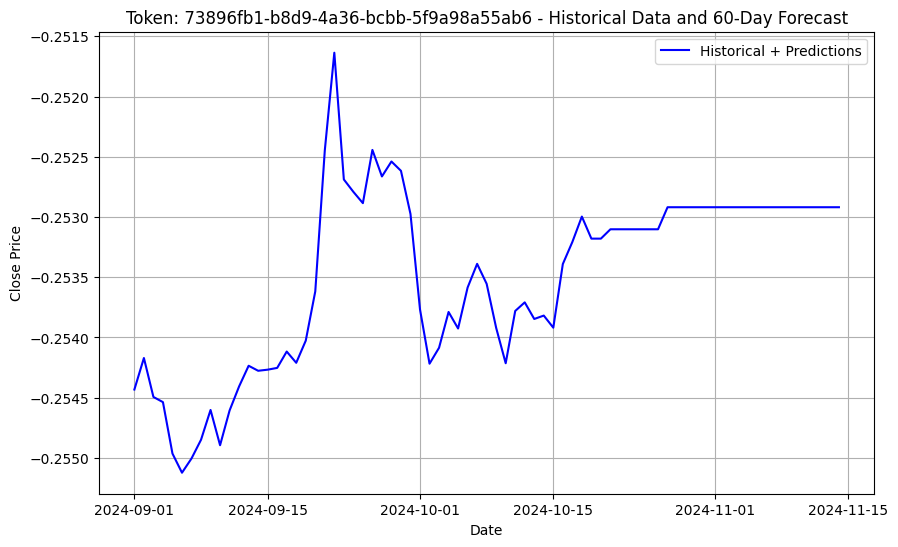

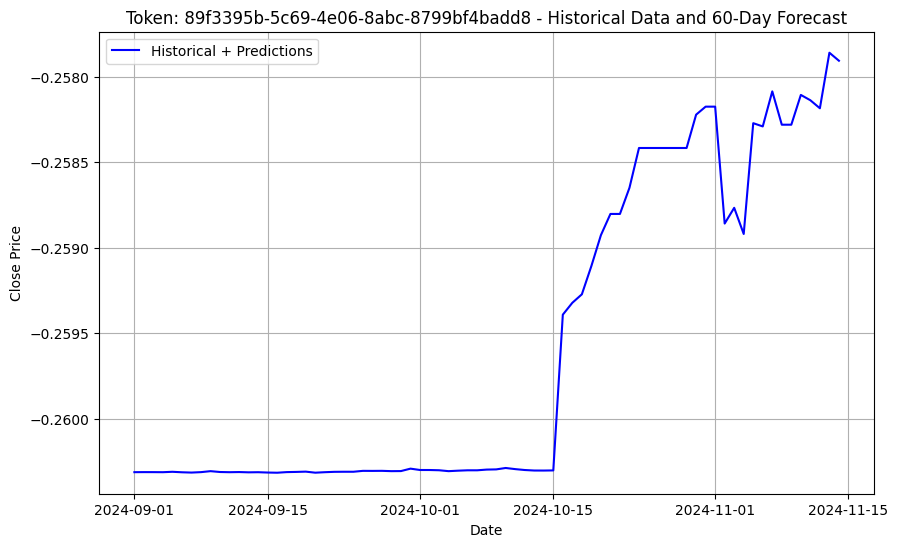

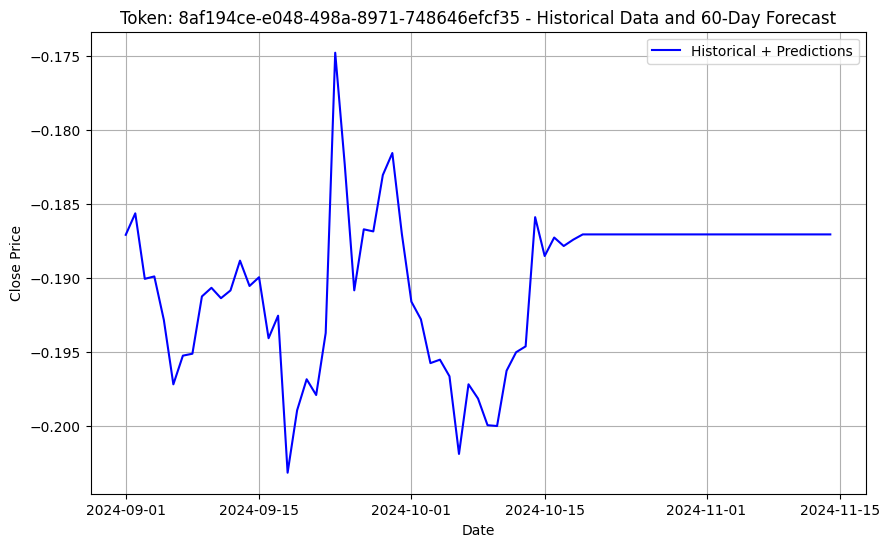

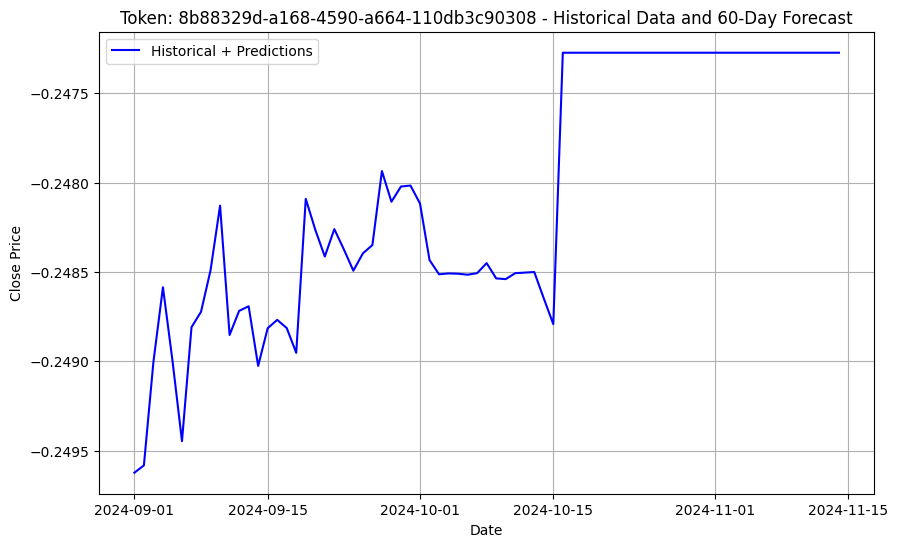

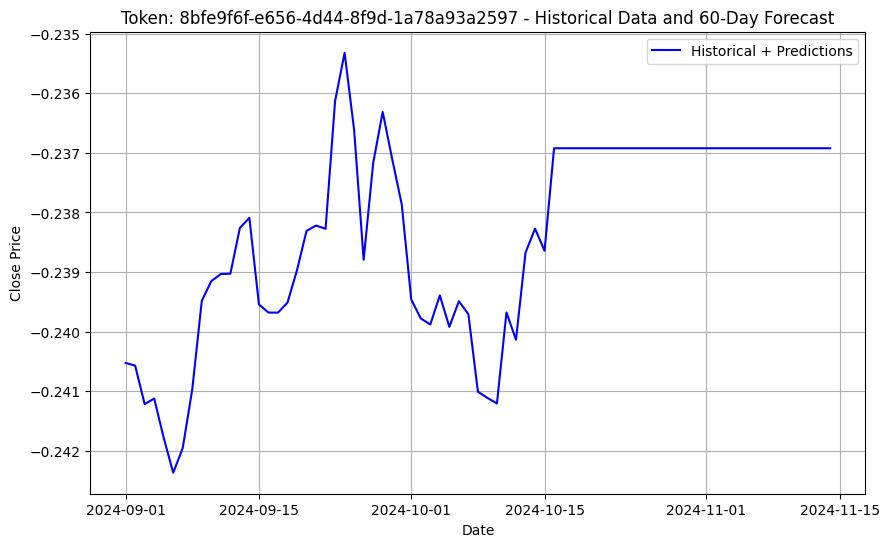

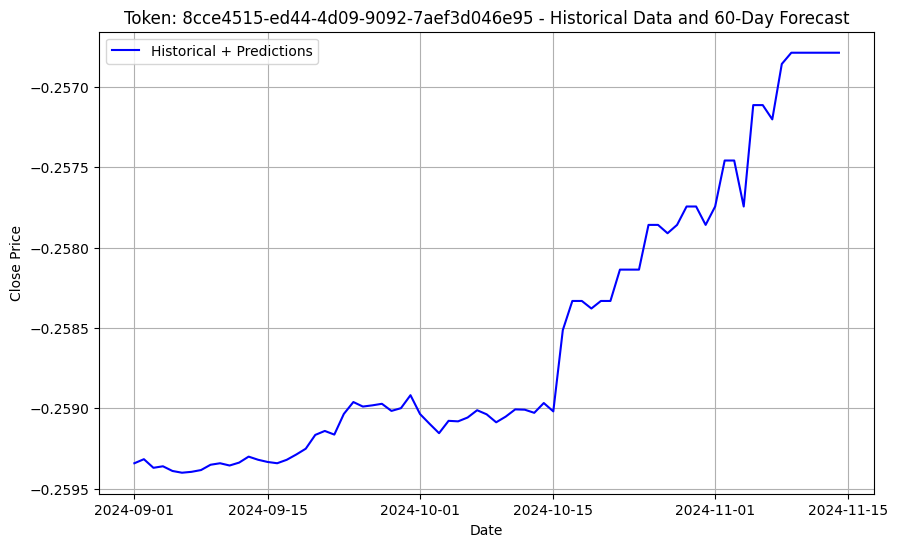

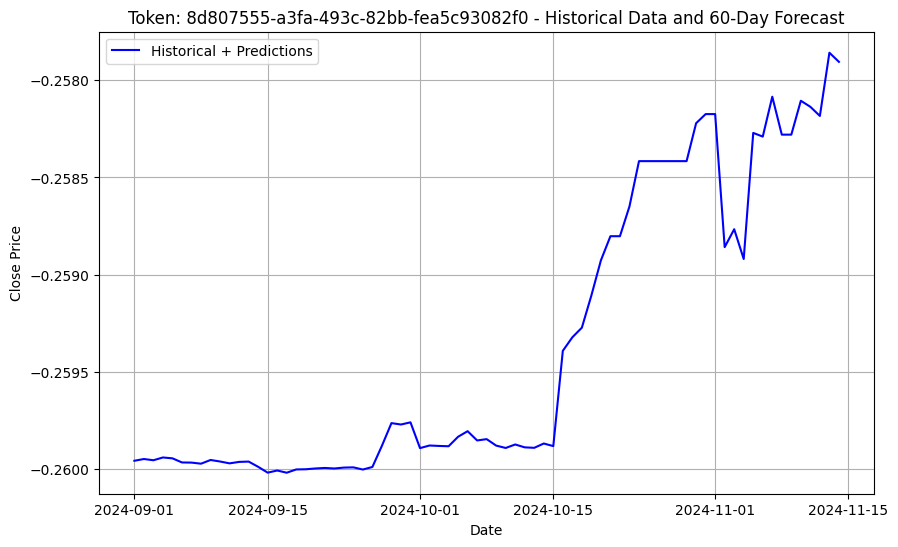

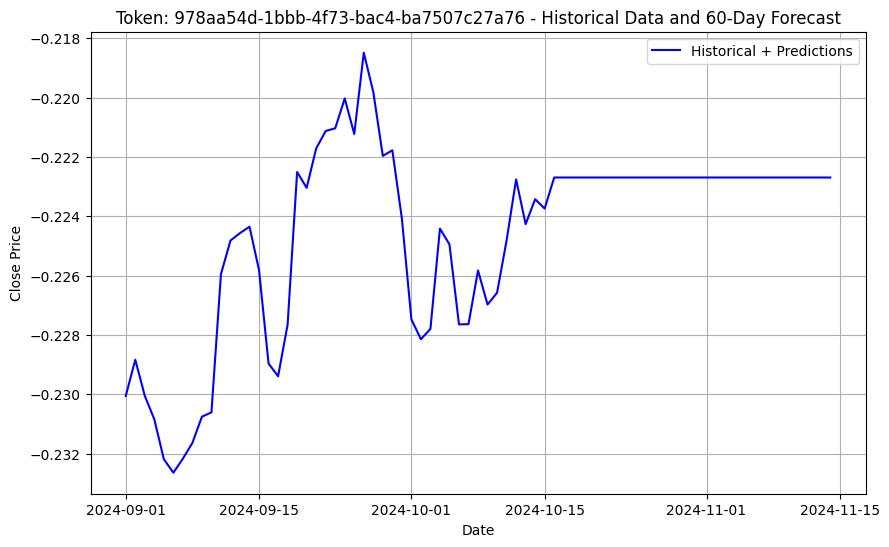

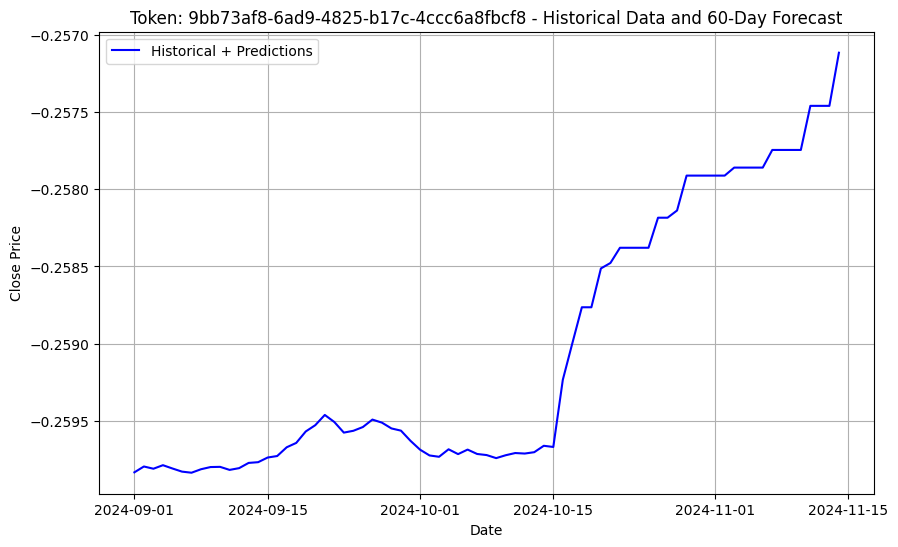

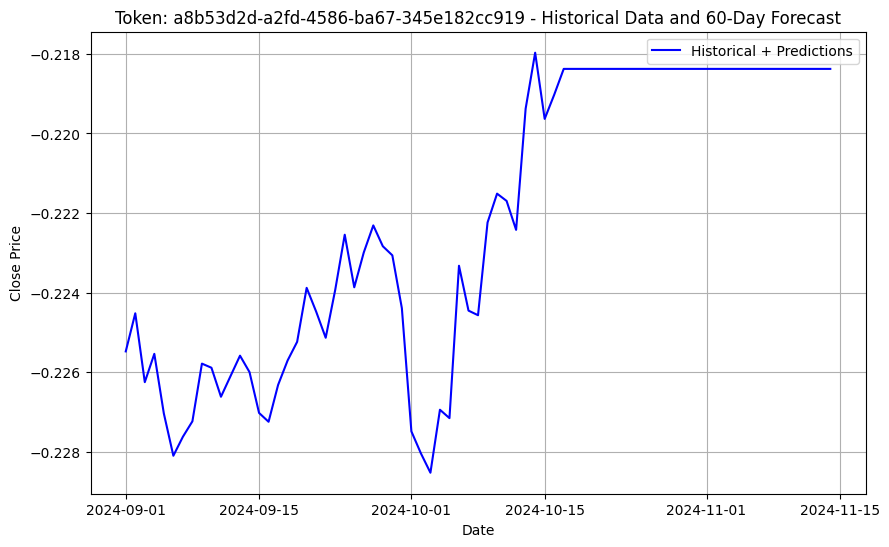

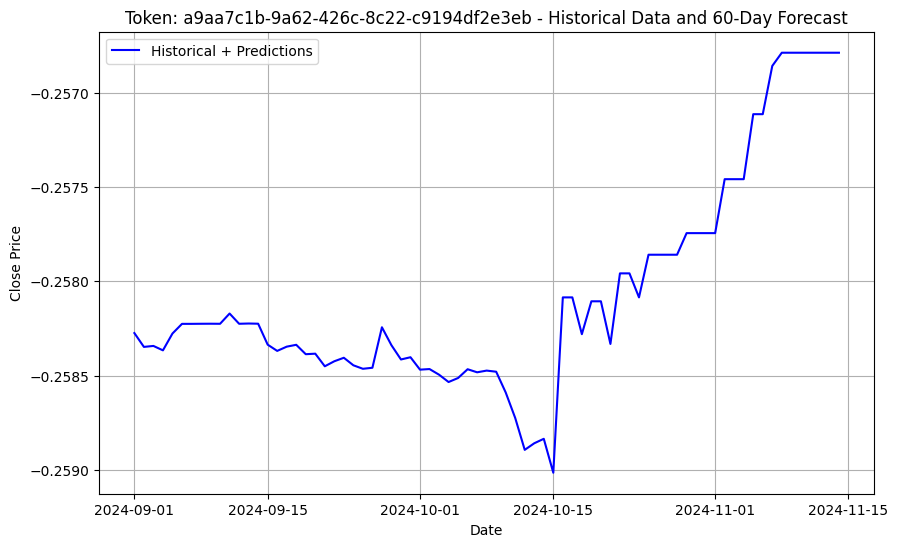

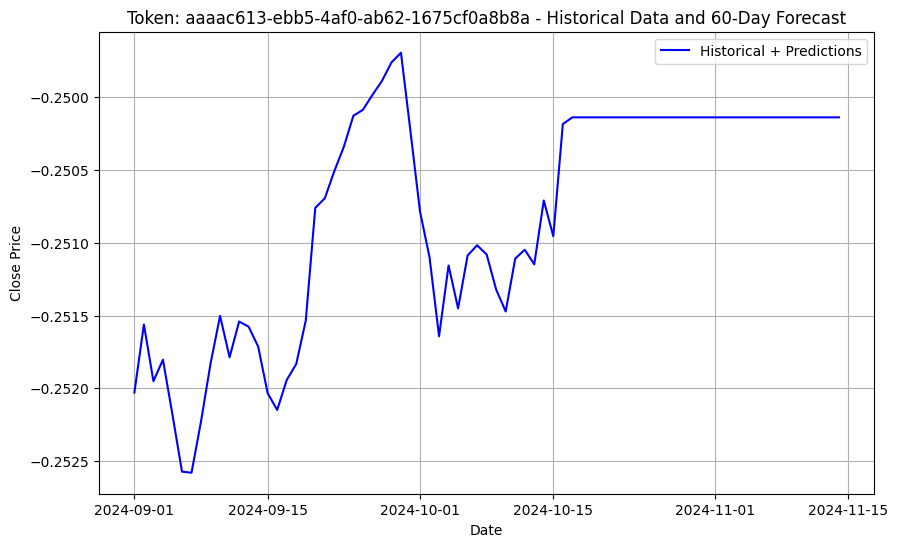

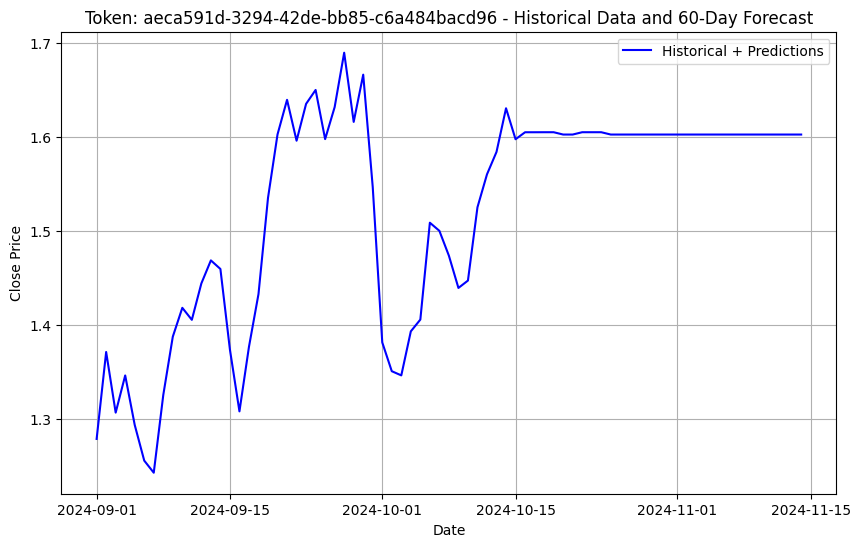

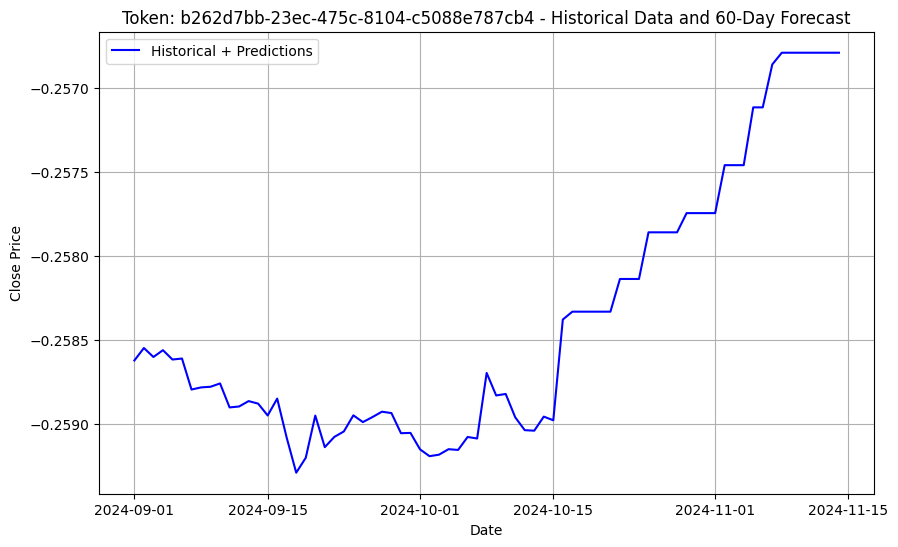

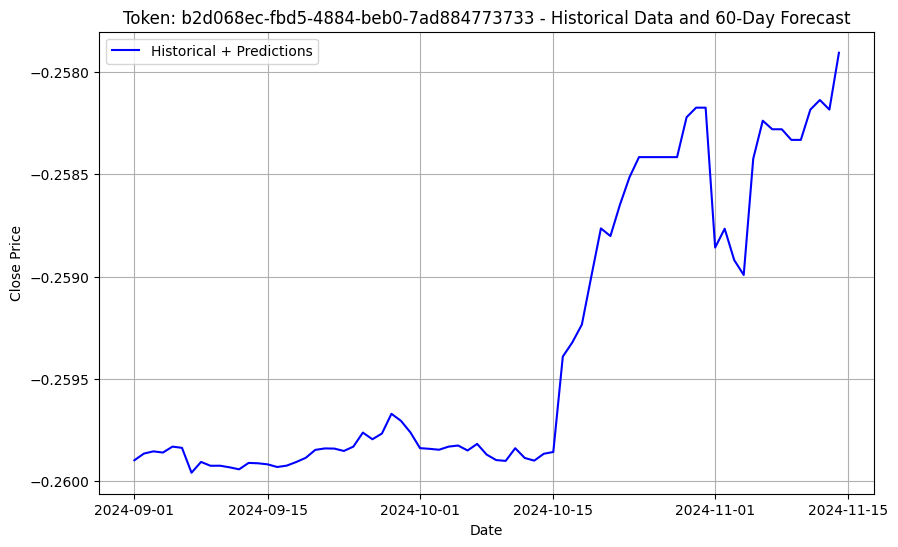

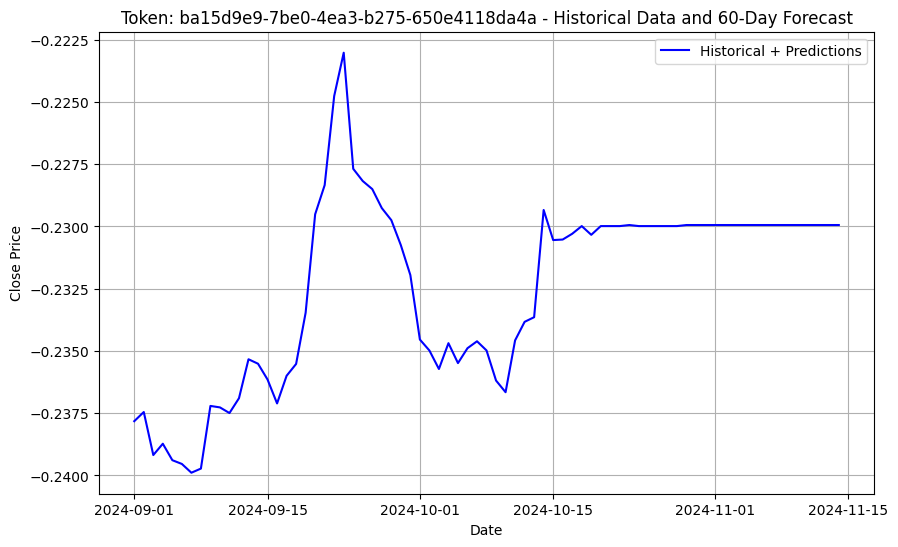

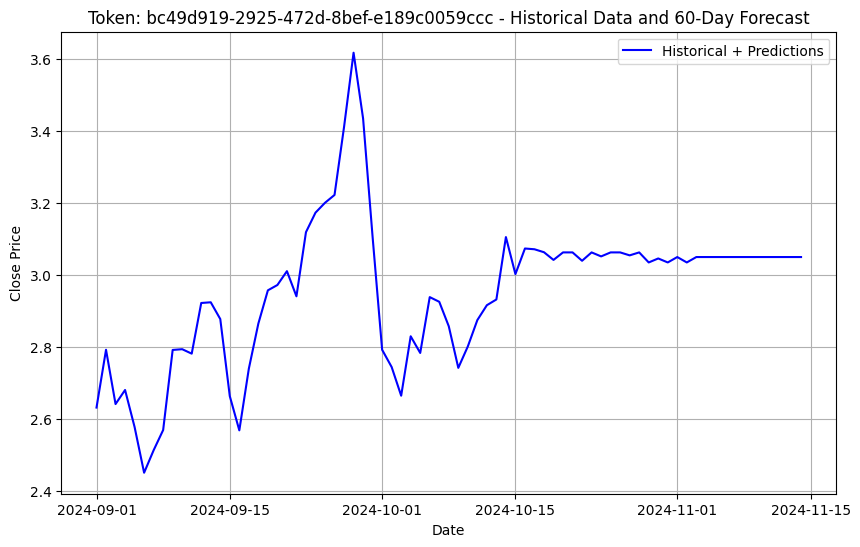

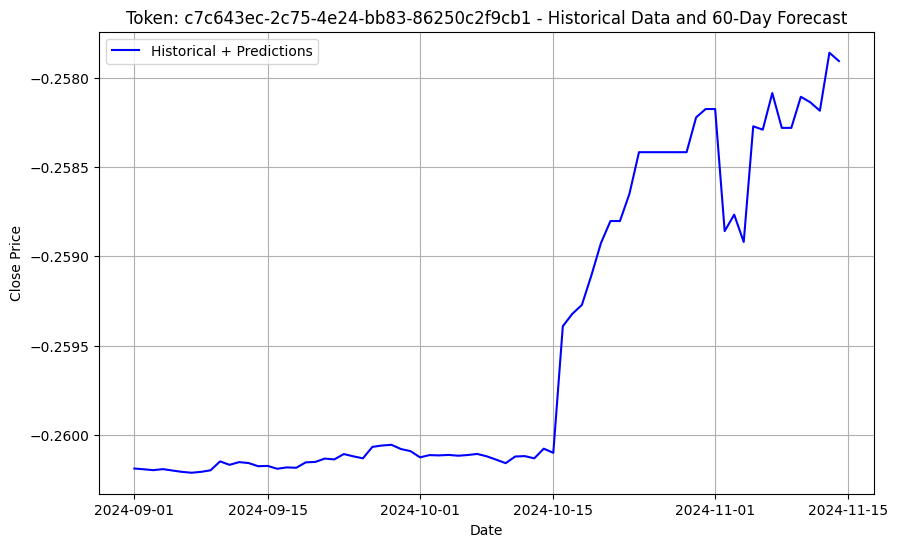

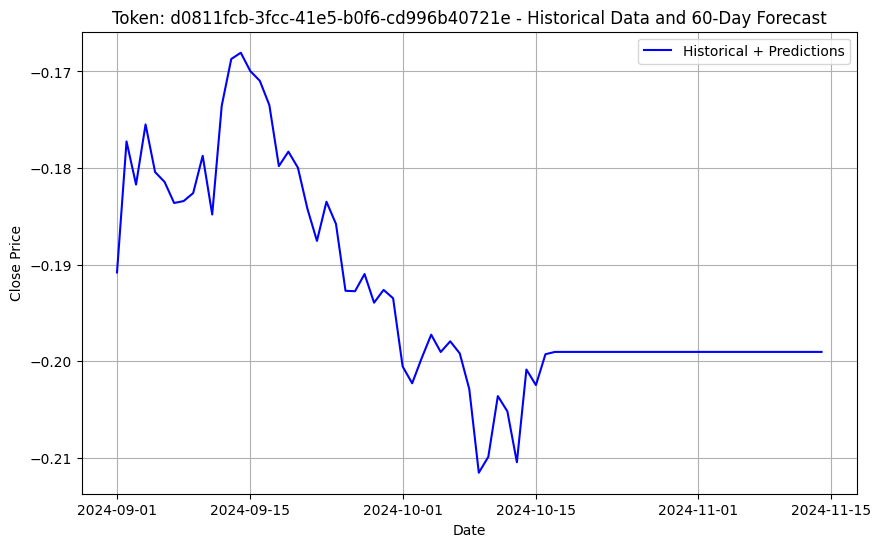

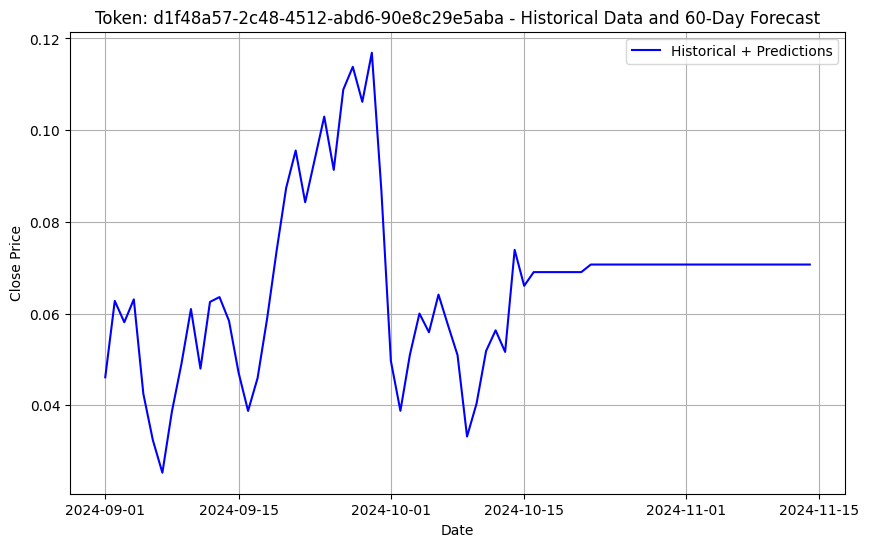

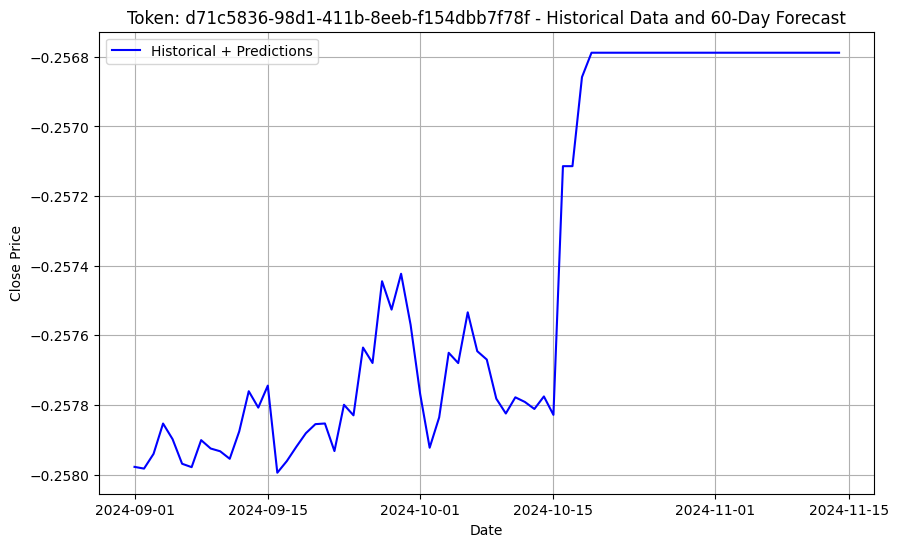

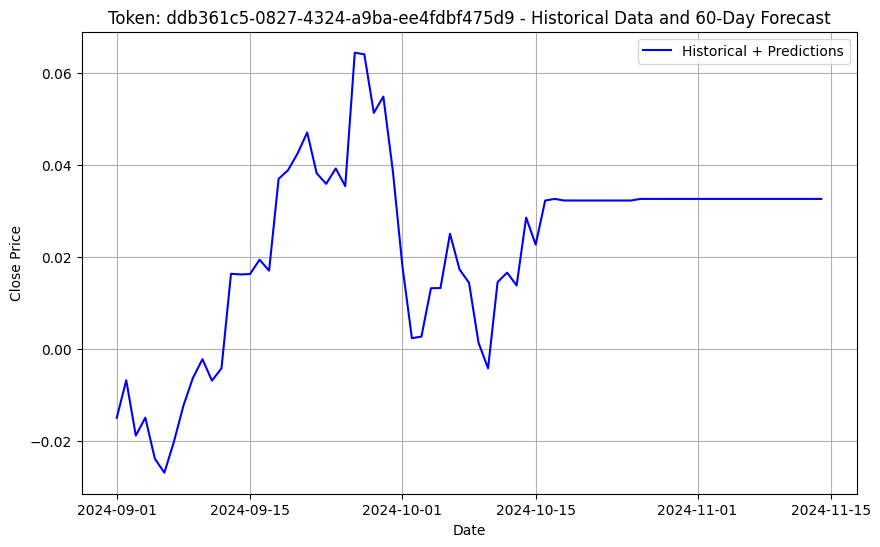

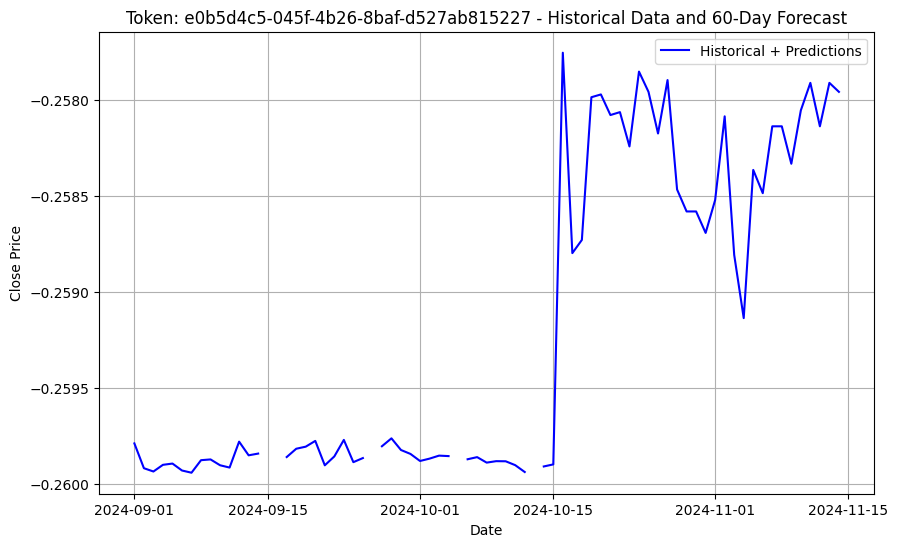

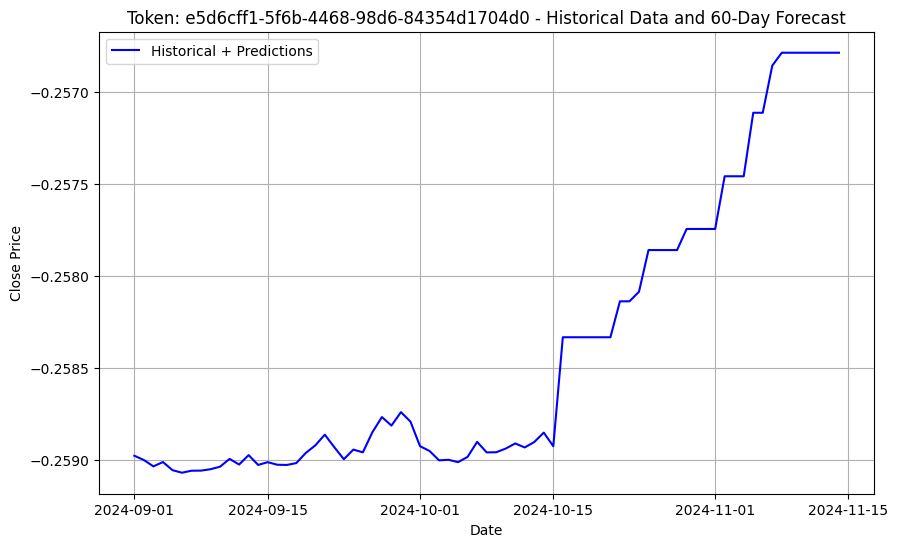

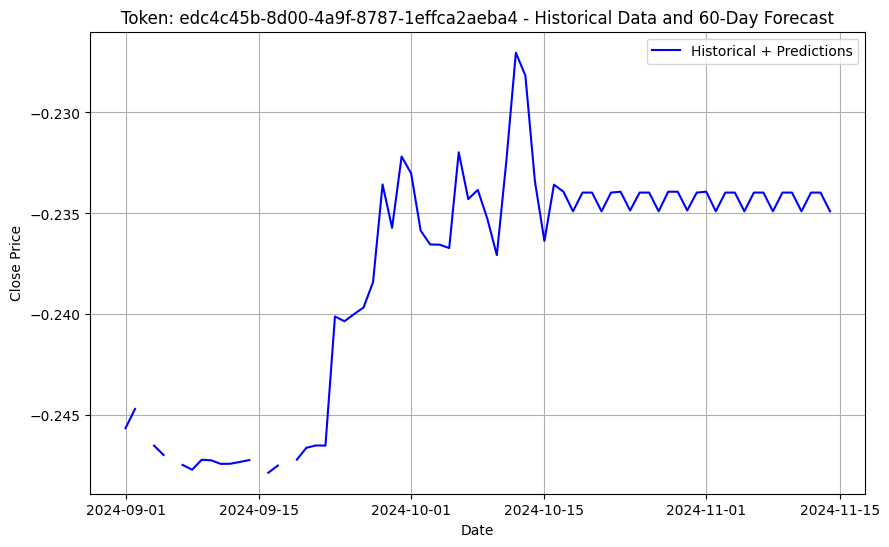

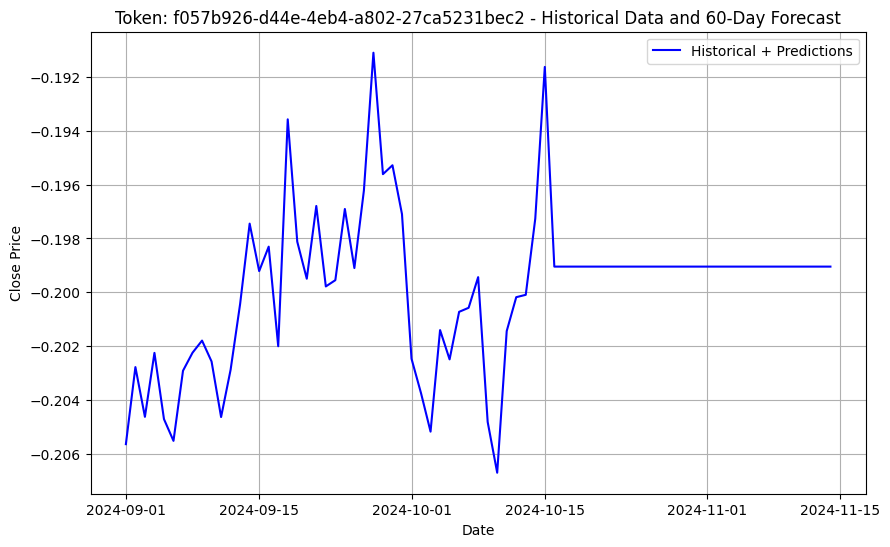

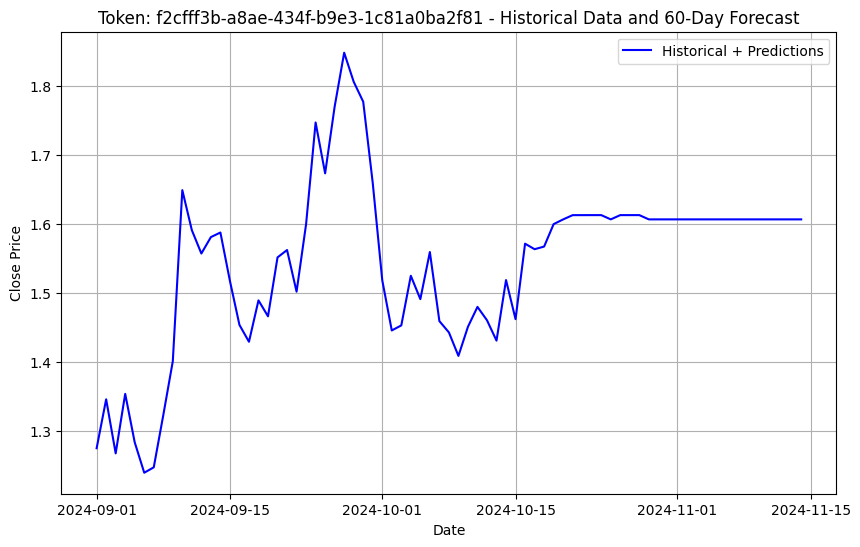

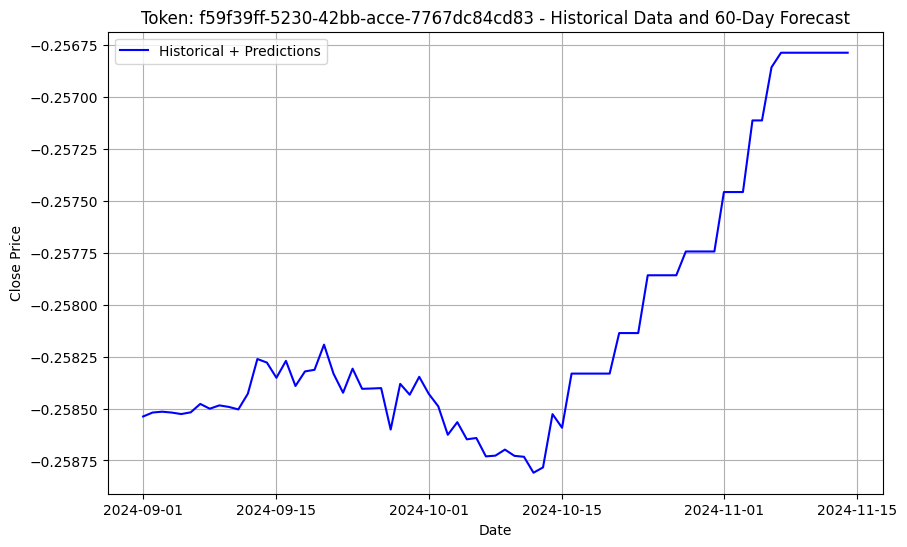

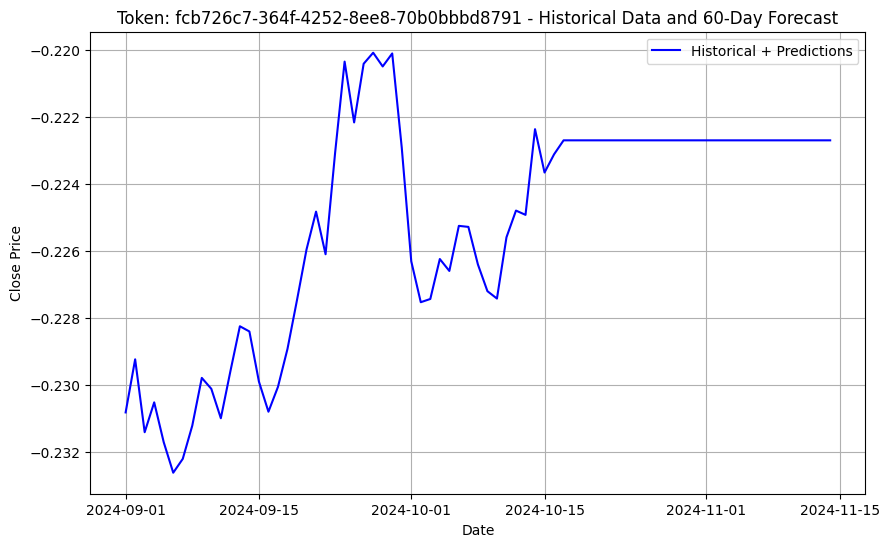

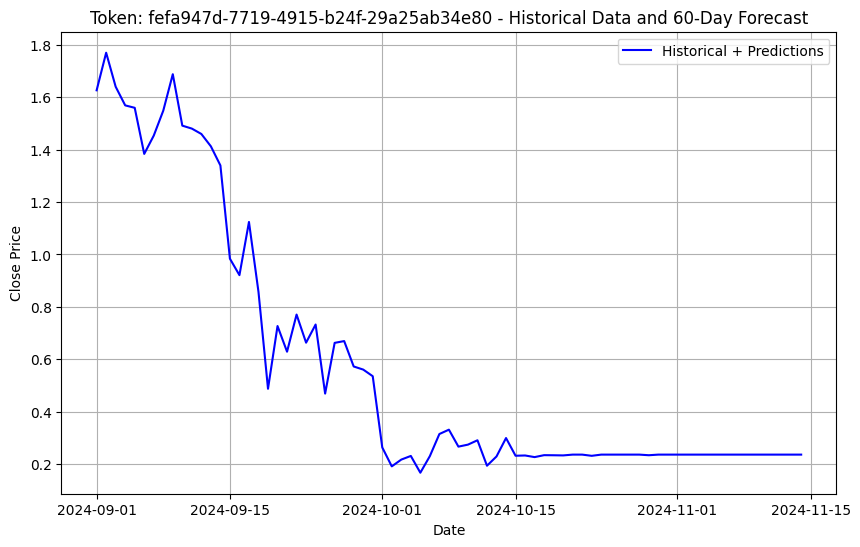

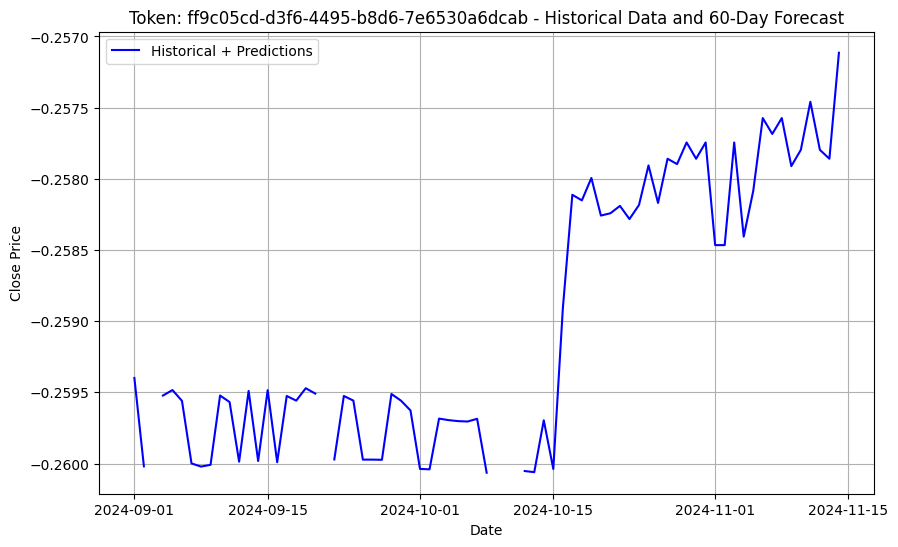

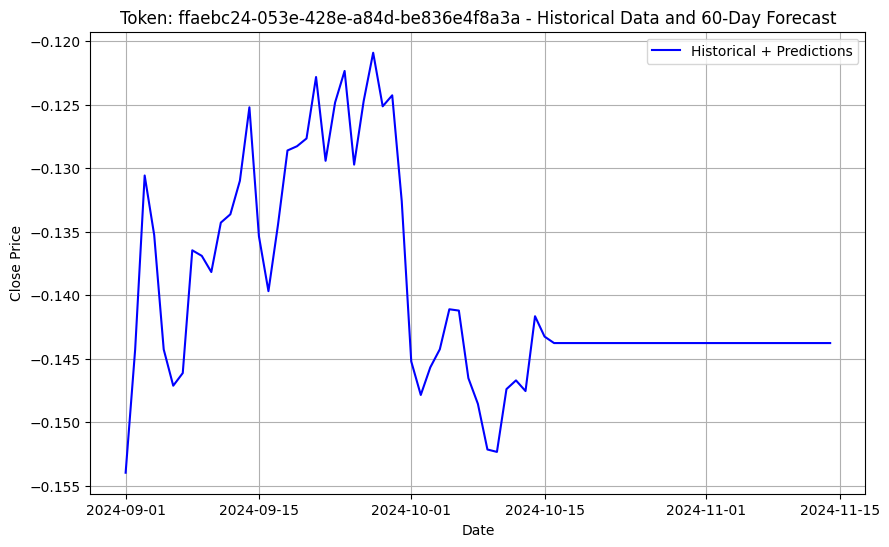

In [118]:
tokens = series_dict.keys()
for token_id, historical_data in series_dict['close'].items():
    # Extract the historical data for the token
    historical_data = historical_data  # historical close prices
    
    # Create a timeline for the predictions (future dates after the last historical data point)
    last_date = historical_data.index[-1]
    future_dates = pd.date_range(start=last_date, periods=steps_ahead+1, freq='D')[1:]  # Skip the last date
    
    # Get the predicted values for the token
    if token_id in predictions_x_days.columns:
        predictions = pd.Series(predictions_x_days[token_id], index=future_dates, name='Predictions')
    else:
        continue
    
    # Concatenate historical data with predictions
    combined_data = pd.concat([historical_data, predictions])
    
    # Filter data since 2024-08-01
    combined_data = combined_data[combined_data.index >= '2024-09-01']
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(combined_data.index, combined_data, label='Historical + Predictions', color='blue')
    # plt.axvline(x=last_date, color='red', linestyle='--', label='Start of Predictions')
    plt.title(f'Token: {token_id} - Historical Data and 60-Day Forecast')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    
    # Display plot
    plt.show()